# Table of Contents
<a id="table-of-contents"></a>
- [1 Introduction](#1)
- [2 Preparations](#2)
- [3 Datasets Overview](#3)
    - [3.1 Train dataset](#3.1)
    - [3.2 Test dataset](#3.2)
    - [3.3 Submission](#3.3)
- [4 Features](#4)
    - [4.1 Unique values](#4.1)
    - [4.2 Distribution](#4.2)

[back to top](#table-of-contents)
<a id="1"></a>
# 1 Introduction

Kaggle competitions are incredibly fun and rewarding, but they can also be intimidating for people who are relatively new in their data science journey. In the past, Kaggle have launched many Playground competitions that are more approachable than Featured competition, and thus more beginner-friendly.

The goal of these competitions is to provide a fun, but less challenging, tabular dataset. These competitions will be great for people looking for something in between the Titanic Getting Started competition and a Featured competition.

The dataset is used for this competition is synthetic, but based on a real dataset and generated using a CTGAN. The original dataset deals with predicting the category on an eCommerce product given various attributes about the listing. Although the features are anonymized, they have properties relating to real-world features.

Submissions are evaluated using multi-class logarithmic loss. Each row in the dataset has been labeled with one true Class. For each row, you must submit the predicted probabilities that the product belongs to each class label. The formula is:

$$ \text{log loss} = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij}), $$

where $N$ is the number of rows in the test set, $M$ is the number of class labels, $\text{log}$ is the natural logarithm, $y_{ij}$ is 1 if observation $i$ is in class $j$ and 0 otherwise, and $p_{ij}$ is the predicted probability that observation $i$ belongs to class $j$.

The submitted probabilities for a given product are not required to sum to one; they are rescaled prior to being scored, each row is divided by the row sum. In order to avoid the extremes of the $\text{log}$ function, predicted probabilities are replaced with $max(min(p,1-10^{-15}),10^{-15})$.

[back to top](#table-of-contents)
<a id="2"></a>
# 2 Preparations
Preparing packages and data that will be used in the analysis process. Packages that will be loaded are mainly for data manipulation, data visualization and modeling. There are 2 datasets that are used in the analysis, they are train and test dataset. The main use of train dataset is to train models and use it to predict test dataset. While sample submission file is used to informed participants on the expected submission for the competition. *(to see the details, please expand)*

In [1]:
# import packages
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# import datasets
train_df = pd.read_csv('../input/tabular-playground-series-jun-2021/train.csv')
test_df = pd.read_csv('../input/tabular-playground-series-jun-2021/test.csv')
submission = pd.read_csv('../input/tabular-playground-series-jun-2021/sample_submission.csv')

[back to top](#table-of-contents)
<a id="3"></a>
# 3 Dataset Overview
The intend of the overview is to get a feel of the data and its structure in train, test and submission file. An overview on train and test datasets will include a quick analysis on missing values and basic statistics, while sample submission will be loaded to see the expected submission.

<a id="3.1"></a>
## 3.1 Train dataset
As stated before, train dataset is mainly used to train predictive model as there is an available target variable in this set. This dataset is also used to explore more on the data itself including find a relation between each predictors and the target variable.

**Observations:**
- There are 9 classes to be predicted, start from `Class_1` to `Class_9` which dominated by `Class_6` followed by `Class_8` and `Class_9`.
- All feature columns are in `int64` or integer format, which make a possibility to treat them as categorical or continuous features. A correct classfication may help to make a better prediction but it’s hard to be done as there is no description and information about the features.
- All of features have a `minimum` and `1st quartile` values of `0` which is stil the same of `median` except for median `feature_12`, `feature_18`, `feature_19`, `feature_20`, `feature_31`, `feature_39`, `feature_43`, `feature_50`, `feature_54` and `feature_56`.
- Most of the features have a mean below 3, except for `feature_43` and `feature_54`.

### 3.1.1 Quick view
Below is the first 5 rows of train dataset:

In [2]:
train_df.head()

id  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0          0          0          6          1          0          0   
1   1          0          0          0          0          0          0   
2   2          0          0          0          0          0          1   
3   3          0          0          7          0          1          5   
4   4          1          0          0          0          0          0   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0          0          0          7          0           0           0   
1          0          0          0          0           0           0   
2          0          3          0          0           1           0   
3          2          2          0          1           2           0   
4          0          0          0          0           0           0   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0           3           0           1           0           0           3   
1           1           0           0           0           0           0   
2           0           0           0           0           0           0   
3           5           0           0           4           0           0   
4           0           0           0           0           0           0   

   feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
0           3           1           0           2           0           0   
1           0           0           0           0           0           0   
2           0           5           4           0           0           0   
3          22           2           1           0           0           0   
4           0           0           1           0           0           0   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0           0           0           0           0           1           0   
1           0           0           0           0           1           0   
2           0           0           0           0           0           1   
3           0           3           0          37           0           1   
4           0           1           0           0           0           0   

   feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
0           0           1           0           0           0           0   
1           0           0           0           0           0           1   
2           0           0           0           0           2           0   
3           3          13           0          10           0           3   
4           0           0           0           0           0           0   

   feature_36  feature_37  feature_38  feature_39  feature_40  feature_41  \
0           0          11           0           0           0           0   
1           0           0           0           0           0           0   
2           0           5           0           5           0           1   
3           1           1           0           7           0           0   
4           0           2           0           5           0           0   

   feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
0           0           9           0           0           0           0   
1           0           2           0           0           1           0   
2           0           0           0           1           0           0   
3           2           0           1           0           0           0   
4           0           0           0           0           0           0   

   feature_48  feature_49  feature_50  feature_51  feature_52  feature_53  \
0           0           0           3           0           1           3   
1           0           0           0           0           0           0   
2           1           0           7           0           1           1   
3           0           0  

The dimension and number of missing values in the train dataset is as below:

In [3]:
print(f'Number of rows: {train_df.shape[0]};  Number of columns: {train_df.shape[1]}; No of missing values: {sum(train_df.isna().sum())}')

Number of rows: 200000;  Number of columns: 77; No of missing values: 0


The train dataset has `200,000` of rows with `77` of columns and there is `0` missing values which is good as there will be no extra step needed to take care of them.

### 3.1.2 Data types
Except `target` column, all of the other columns are in `int64` type. *(to see the details, please expand)*

In [4]:
train_df.dtypes

id             int64
feature_0      int64
feature_1      int64
feature_2      int64
feature_3      int64
feature_4      int64
feature_5      int64
feature_6      int64
feature_7      int64
feature_8      int64
feature_9      int64
feature_10     int64
feature_11     int64
feature_12     int64
feature_13     int64
feature_14     int64
feature_15     int64
feature_16     int64
feature_17     int64
feature_18     int64
feature_19     int64
feature_20     int64
feature_21     int64
feature_22     int64
feature_23     int64
feature_24     int64
feature_25     int64
feature_26     int64
feature_27     int64
feature_28     int64
feature_29     int64
feature_30     int64
feature_31     int64
feature_32     int64
feature_33     int64
feature_34     int64
feature_35     int64
feature_36     int64
feature_37     int64
feature_38     int64
feature_39     int64
feature_40     int64
feature_41     int64
feature_42     int64
feature_43     int64
feature_44     int64
feature_45     int64
feature_46   

### 3.1.3 Basic statistics
Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

#### 3.1.3.1 Id and features column

In [5]:
train_df.describe()

id      feature_0      feature_1      feature_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean    99999.500000       0.972710       1.168365       2.219325   
std     57735.171256       3.941836       3.993407       6.476570   
min         0.000000       0.000000       0.000000       0.000000   
25%     49999.750000       0.000000       0.000000       0.000000   
50%     99999.500000       0.000000       0.000000       0.000000   
75%    149999.250000       1.000000       1.000000       1.000000   
max    199999.000000      61.000000      51.000000      64.000000   

           feature_3      feature_4      feature_5      feature_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        2.296735       0.793530       1.431105       1.010695   
std         7.551858       2.935785       5.162746       3.949231   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       1.000000       0.000000   
max        70.000000      38.000000      76.000000      43.000000   

           feature_7     feature_8      feature_9     feature_10  \
count  200000.000000  200000.00000  200000.000000  200000.000000   
mean        0.673090       1.94398       1.719655       1.422550   
std         2.234949       3.93133       5.916988       3.288376   
min         0.000000       0.00000       0.000000       0.000000   
25%         0.000000       0.00000       0.000000       0.000000   
50%         0.000000       0.00000       0.000000       0.000000   
75%         0.000000       2.00000       1.000000       1.000000   
max        30.000000      38.00000      72.000000      33.000000   

          feature_11     feature_12     feature_13     feature_14  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.980955       2.444760       1.078085       1.406445   
std         3.837771       3.421765       3.713650       2.868740   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       3.000000       1.000000       2.000000   
max        46.000000      37.000000      43.000000      32.000000   

          feature_15     feature_16     feature_17     feature_18  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.413200       1.389720       0.317740       1.656610   
std         8.240441       3.056888       1.052619       2.557042   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       0.000000       2.000000   
max       121.000000      27.000000      14.000000      22.000000   

          feature_19     feature_20     feature_21     feature_22  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.186895       1.438510       1.031415       1.465935   
std        13.982531       2.666167       2.931762       6.734983   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         2.000000       1.000000       0.000000       0.000000   
75%         7.000000       2.000000       1.000000       0.000000   
max       263.000000      30.000000      33.000000     123.000000   

          feature_23     feature_24     feature_25     feature_26  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.572000       1.061165       2.348775       0.774490   
std         1.676326       5.718083       7.319992       1.752804   
min         0.00000

#### 3.1.3.2 Target column
There will be `9 classes` that will be predicted in this competition. Most frequent class in the target column is `Class_6` with a frequency of `51,811`, that contribute more than `25%` of the train dataset.

In [6]:
print('Target column basic statistics:')
train_df['target'].describe()

Target column basic statistics:


count      200000
unique          9
top       Class_6
freq        51811
Name: target, dtype: object

In [7]:
print('Frequency of each target classes:')
train_df['target'].value_counts()

Frequency of each target classes:


Class_6    51811
Class_8    51763
Class_9    25542
Class_2    24431
Class_3    14798
Class_7    14769
Class_1     9118
Class_4     4704
Class_5     3064
Name: target, dtype: int64

[back to top](#table-of-contents)
<a id="3.2"></a>
## 3.2 Test dataset
Test dataset is used to make a prediction based on the model that has previously trained. Exploration in this dataset is also needed to see how the data is structured and especially on it’s similiarity with the train dataset.

**Observations:**
- Observations in the `train` dataset are still consistent in the `test` dataset.

### 3.2.1 Quick view
Below is the first 5 rows of test dataset:

In [8]:
test_df.head()

id  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  200000          0          0          0          0          0          0   
1  200001          1          2          0          0          0          0   
2  200002          0          1          7          1          0          0   
3  200003          0          0          0          4          3          1   
4  200004          0          0          5          0          0          0   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0          0          0          0          0           0           0   
1          0          0          0          0           1           0   
2          0          0          6          0           1           0   
3          0          0          0          0           7           0   
4          0          0          0          8           1           0   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0           0           0           0           0           0           0   
1           2           2           0           0           1           0   
2           0           0           1           0           0           1   
3           0           0           7           0           0           0   
4           2           0           0           0           0           0   

   feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
0           0           0           0           0           0           0   
1           0           0           2           0           0           1   
2           0           0           0           0           0           1   
3           5           0           1           0           0           0   
4           9           1           0           0           0           0   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0           0           0           0           0           0           0   
1           0           3           0           1           0           0   
2           0           0           0           0           2           0   
3           0           0           0           2           0           0   
4           0           0           0           0           3           0   

   feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
0           0           0           0           0           0           0   
1           2           0           0           1           0           0   
2           0           4           0           0           0           0   
3           1           0           0           0           0           0   
4           5           0           0           0           1           0   

   feature_36  feature_37  feature_38  feature_39  feature_40  feature_41  \
0           2           0           0           0           0           0   
1           0           0           0           0           1           0   
2           0           0           0           0           1           0   
3           0           0           0           1           0           0   
4           0           0           0           0           0           0   

   feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
0           0           0           0           0           0           0   
1           0           0           0           1           0           0   
2           0           4           0           0           1           0   
3           7           5           0           0           0           0   
4           0           0           0           0           2           0   

   feature_48  feature_49  feature_50  feature_51  feature_52  feature_53  \
0           0           0           0           0           0           0   
1           0           0           1           0           1           3   
2           0           0           6           0           0           2   
3      

The dimension and number of missing values in the test dataset is as below:

In [9]:
print(f'Number of rows: {test_df.shape[0]};  Number of columns: {test_df.shape[1]}; No of missing values: {sum(test_df.isna().sum())}')

Number of rows: 100000;  Number of columns: 76; No of missing values: 0


Similar to the train dataset, test dataset has `100,000` of rows with `76` of columns and there is `0` missing value. There is no `target` in the test dataset. 

### 3.2.2 Data types
All columns are in `int64` type which is consistent with the train dataset. *(to see the details, please expand)*

In [10]:
test_df.dtypes

id            int64
feature_0     int64
feature_1     int64
feature_2     int64
feature_3     int64
feature_4     int64
feature_5     int64
feature_6     int64
feature_7     int64
feature_8     int64
feature_9     int64
feature_10    int64
feature_11    int64
feature_12    int64
feature_13    int64
feature_14    int64
feature_15    int64
feature_16    int64
feature_17    int64
feature_18    int64
feature_19    int64
feature_20    int64
feature_21    int64
feature_22    int64
feature_23    int64
feature_24    int64
feature_25    int64
feature_26    int64
feature_27    int64
feature_28    int64
feature_29    int64
feature_30    int64
feature_31    int64
feature_32    int64
feature_33    int64
feature_34    int64
feature_35    int64
feature_36    int64
feature_37    int64
feature_38    int64
feature_39    int64
feature_40    int64
feature_41    int64
feature_42    int64
feature_43    int64
feature_44    int64
feature_45    int64
feature_46    int64
feature_47    int64
feature_48    int64


### 3.2.3 Basic statistics
Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

In [11]:
test_df.describe()

id     feature_0      feature_1      feature_2  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean   249999.500000       0.99051       1.168520       2.182730   
std     28867.657797       4.01893       4.030234       6.402817   
min    200000.000000       0.00000       0.000000       0.000000   
25%    224999.750000       0.00000       0.000000       0.000000   
50%    249999.500000       0.00000       0.000000       0.000000   
75%    274999.250000       1.00000       1.000000       1.000000   
max    299999.000000      61.00000      51.000000      64.000000   

           feature_3      feature_4      feature_5      feature_6  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        2.316240       0.792050       1.435520       1.016930   
std         7.584742       2.938386       5.164174       3.956569   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       1.000000       0.000000   
max        70.000000      38.000000      76.000000      43.000000   

           feature_7      feature_8      feature_9     feature_10  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.679780       1.945370       1.716100       1.392320   
std         2.262651       3.938406       5.876687       3.194114   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       2.000000       1.000000       1.000000   
max        30.000000      38.000000      72.000000      33.000000   

          feature_11     feature_12     feature_13     feature_14  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        1.004740       2.433260       1.061720       1.409220   
std         3.915981       3.419176       3.669671       2.875413   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       3.000000       1.000000       2.000000   
max        46.000000      37.000000      43.000000      32.000000   

          feature_15     feature_16     feature_17     feature_18  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        1.359410       1.385640       0.315960       1.656700   
std         8.002172       3.038772       1.032095       2.550535   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       0.000000       2.000000   
max       121.000000      27.000000      14.000000      22.000000   

          feature_19    feature_20     feature_21     feature_22  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean        6.258360       1.44348       1.029740       1.429920   
std        14.230285       2.69081       2.938303       6.688267   
min         0.000000       0.00000       0.000000       0.000000   
25%         0.000000       0.00000       0.000000       0.000000   
50%         2.000000       1.00000       0.000000       0.000000   
75%         7.000000       2.00000       1.000000       0.000000   
max       263.000000      30.00000      33.000000     123.000000   

         feature_23     feature_24     feature_25     feature_26  \
count  100000.00000  100000.000000  100000.000000  100000.000000   
mean        0.57528       1.063300       2.366270       0.777330   
std         1.68714       5.696616       7.362339       1.748136   
min         0.00000       0.0000

[back to top](#table-of-contents)
<a id="3.3"></a>
## 3.3 Submission
Please be caution on the prediction submission format! It’s not same as the target column in train dataset that predict each clases. The submission file is expected to have a prediction probability that the product belongs on each of the classes seen in the dataset.

Below is the first 5 rows of submission file:

In [12]:
submission.head()

id  Class_1  Class_2  Class_3  Class_4  Class_5  Class_6  Class_7  \
0  200000   0.1111   0.1111   0.1111   0.1111   0.1111   0.1111   0.1111   
1  200001   0.1111   0.1111   0.1111   0.1111   0.1111   0.1111   0.1111   
2  200002   0.1111   0.1111   0.1111   0.1111   0.1111   0.1111   0.1111   
3  200003   0.1111   0.1111   0.1111   0.1111   0.1111   0.1111   0.1111   
4  200004   0.1111   0.1111   0.1111   0.1111   0.1111   0.1111   0.1111   

   Class_8  Class_9  
0   0.1111   0.1111  
1   0.1111   0.1111  
2   0.1111   0.1111  
3   0.1111   0.1111  
4   0.1111   0.1111

[back to top](#table-of-contents)
<a id="4"></a>
# 4 Features
Number of features available to be used to create a prediction model are `75`. The analysis is started by looking on number of unique value on each features and progressed with a comparison between train and test dataset on each features.

<a id="4.1"></a>
## 4.1 Unique values
In the structure of the train and test dataset, all of the features are in integer values. Counting number of unique value on train & test dataset wil be performed to see how feature are distributed.

## 4.1.1 Preparation
Prepare train dataset for data analysis and visualization. *(to see the details, please expand)*

In [13]:
features = [feature for feature in train_df.columns if feature not in ['id', 'target']]
unique_values_train = np.zeros(2)
for feature in features:
    temp = train_df[feature].unique()
    unique_values_train = np.concatenate([unique_values_train, temp])
unique_values_train = np.unique(unique_values_train)

unique_values_test = np.zeros(2)
for feature in features:
    temp = test_df[feature].unique()
    unique_values_test = np.concatenate([unique_values_test, temp])
unique_values_test = np.unique(unique_values_test)

unique_value_feature_train = pd.DataFrame(train_df[features].nunique())
unique_value_feature_train = unique_value_feature_train.reset_index(drop=False)
unique_value_feature_train.columns = ['Features', 'Count']
unique_value_feature_test = pd.DataFrame(test_df[features].nunique())
unique_value_feature_test = unique_value_feature_test.reset_index(drop=False)
unique_value_feature_test.columns = ['Features', 'Count']

unique_value_feature_diff = unique_value_feature_train.copy()
unique_value_feature_diff['Count'] = unique_value_feature_train['Count'] - unique_value_feature_test['Count']
unique_value_feature_diff = unique_value_feature_diff[unique_value_feature_diff['Count']!=0]

transpose_features_train = train_df[features]
transpose_features_train = transpose_features_train.apply(pd.Series.value_counts, axis=1).fillna(0)
transpose_features_test = test_df[features]
transpose_features_test = transpose_features_test.apply(pd.Series.value_counts, axis=1).fillna(0)

### 4.1.2 Range

Collecting each unique values in train and test dataset and plot it into a bar chart to show the range of their unique values and to have a comparison between train and test datasets.

**Observations:**
- There are some differences of unique values between train and test dataset for value above 100. 
- Both train and test dataset has a range from 0 to 352.

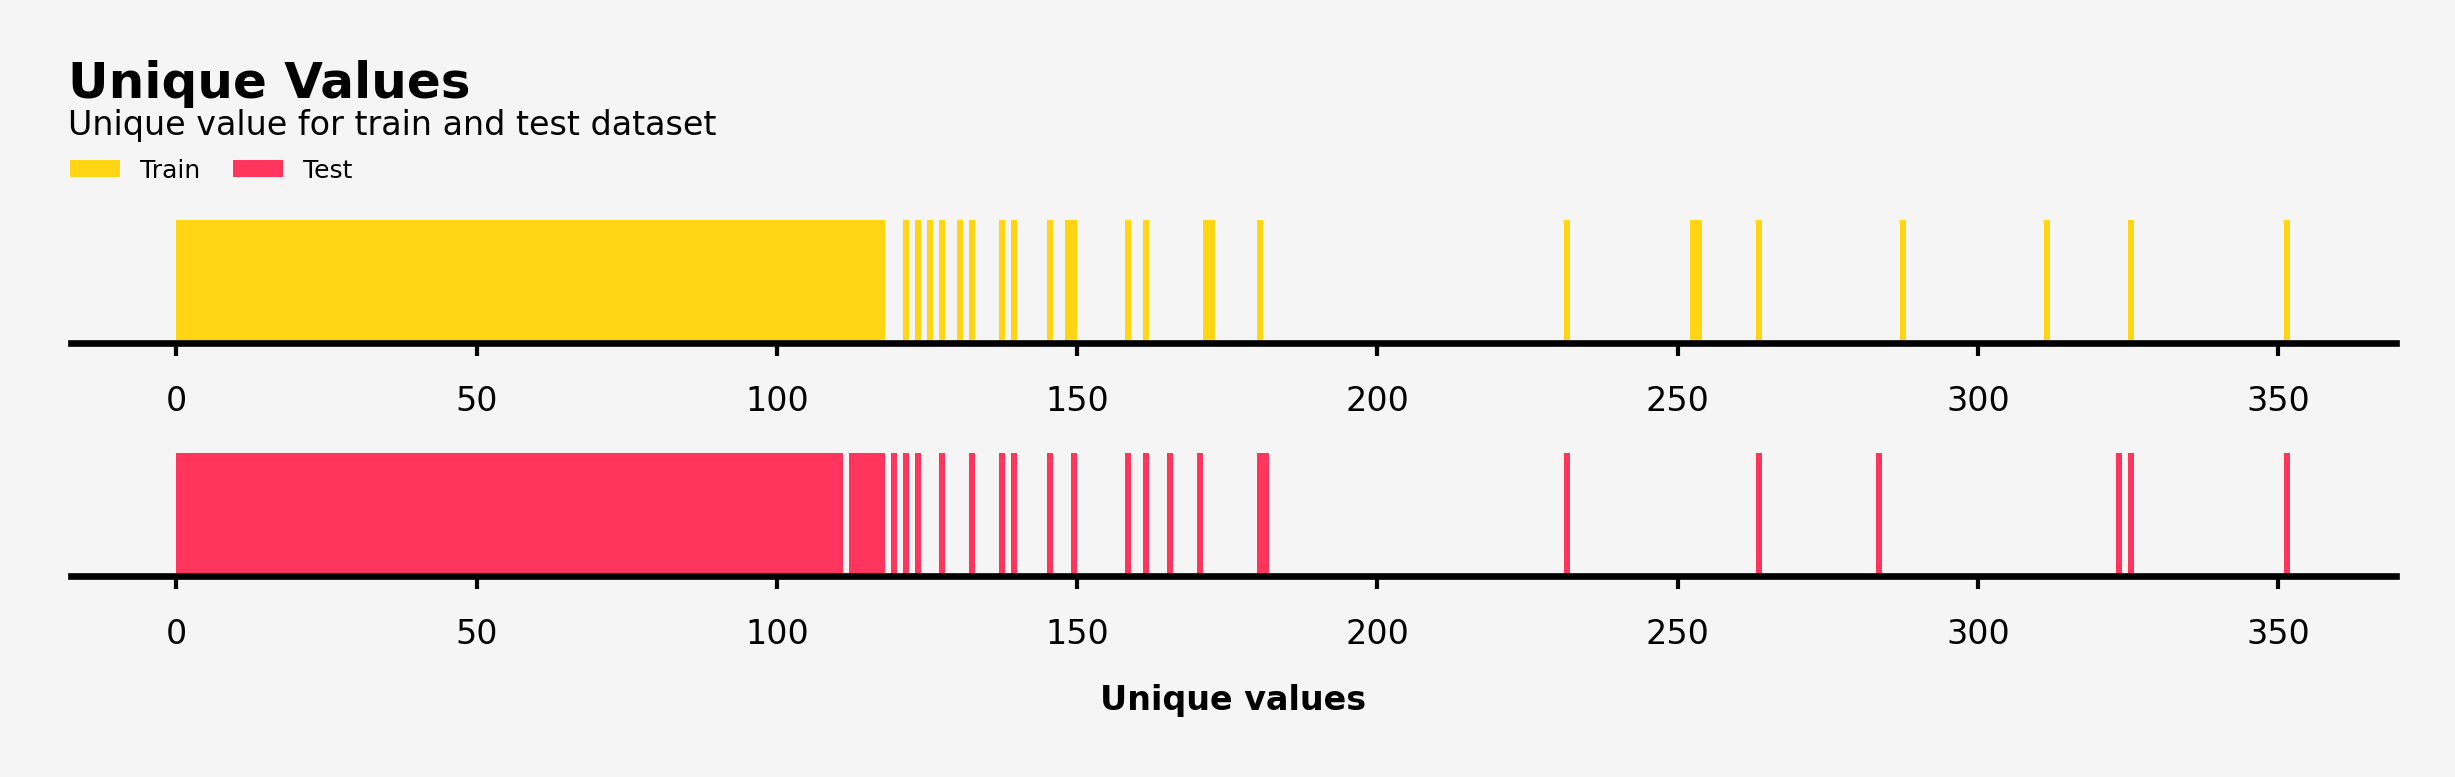

In [14]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 0.8), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.8)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514'])

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top", "left"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0.tick_params(axis = "y", which = "both", left = False)
ax0_sns = sns.histplot(ax=ax0, x=unique_values_train, zorder=2, bins=352, linewidth=0, alpha=1)
ax0_sns.set_xlabel("Unique values",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.get_yaxis().set_visible(False)
ax0.text(-18, 2.3, 'Unique Values', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(-18, 1.9, 'Unique value for train and test dataset', fontsize=4, ha='left', va='top')
ax0_sns.legend(['Train', 'Test'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=3, bbox_to_anchor=(-0.01, 1.6), loc='upper left')

background_color = "#f6f5f5"
sns.set_palette(['#ff355d'])

ax1 = fig.add_subplot(gs[1, 0])
for s in ["right", "top", "left"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1.tick_params(axis = "y", which = "both", left = False)
ax1_sns = sns.histplot(ax=ax1, x=unique_values_test, zorder=2, bins=352, linewidth=0, alpha=1)
ax1_sns.set_xlabel("Unique values",fontsize=4, weight='bold')
ax1_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax1_sns.get_yaxis().set_visible(False)
ax1_sns.legend(['Test'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=3, bbox_to_anchor=(0.06, 3.4), loc='upper left')

plt.show()

### 4.1.3 Individual features

Count how many unique values in each features and perform differences calculation on train and test datasets to see how both datasets differ from one to another.

**Observations:**
- `feature_15` has the highest unique values that are above 100 followed by `feature_46`, `feature_59`, `feature_60` and `feature_73` with more than 80 unique values.
- There are differences between train and test dataset unique values on `feature_15`, `feature_28`, `feature_46`, `feature_59`, `feature_60` and `feature_73`. The highest differences is from `features_60` which is more than `10`.

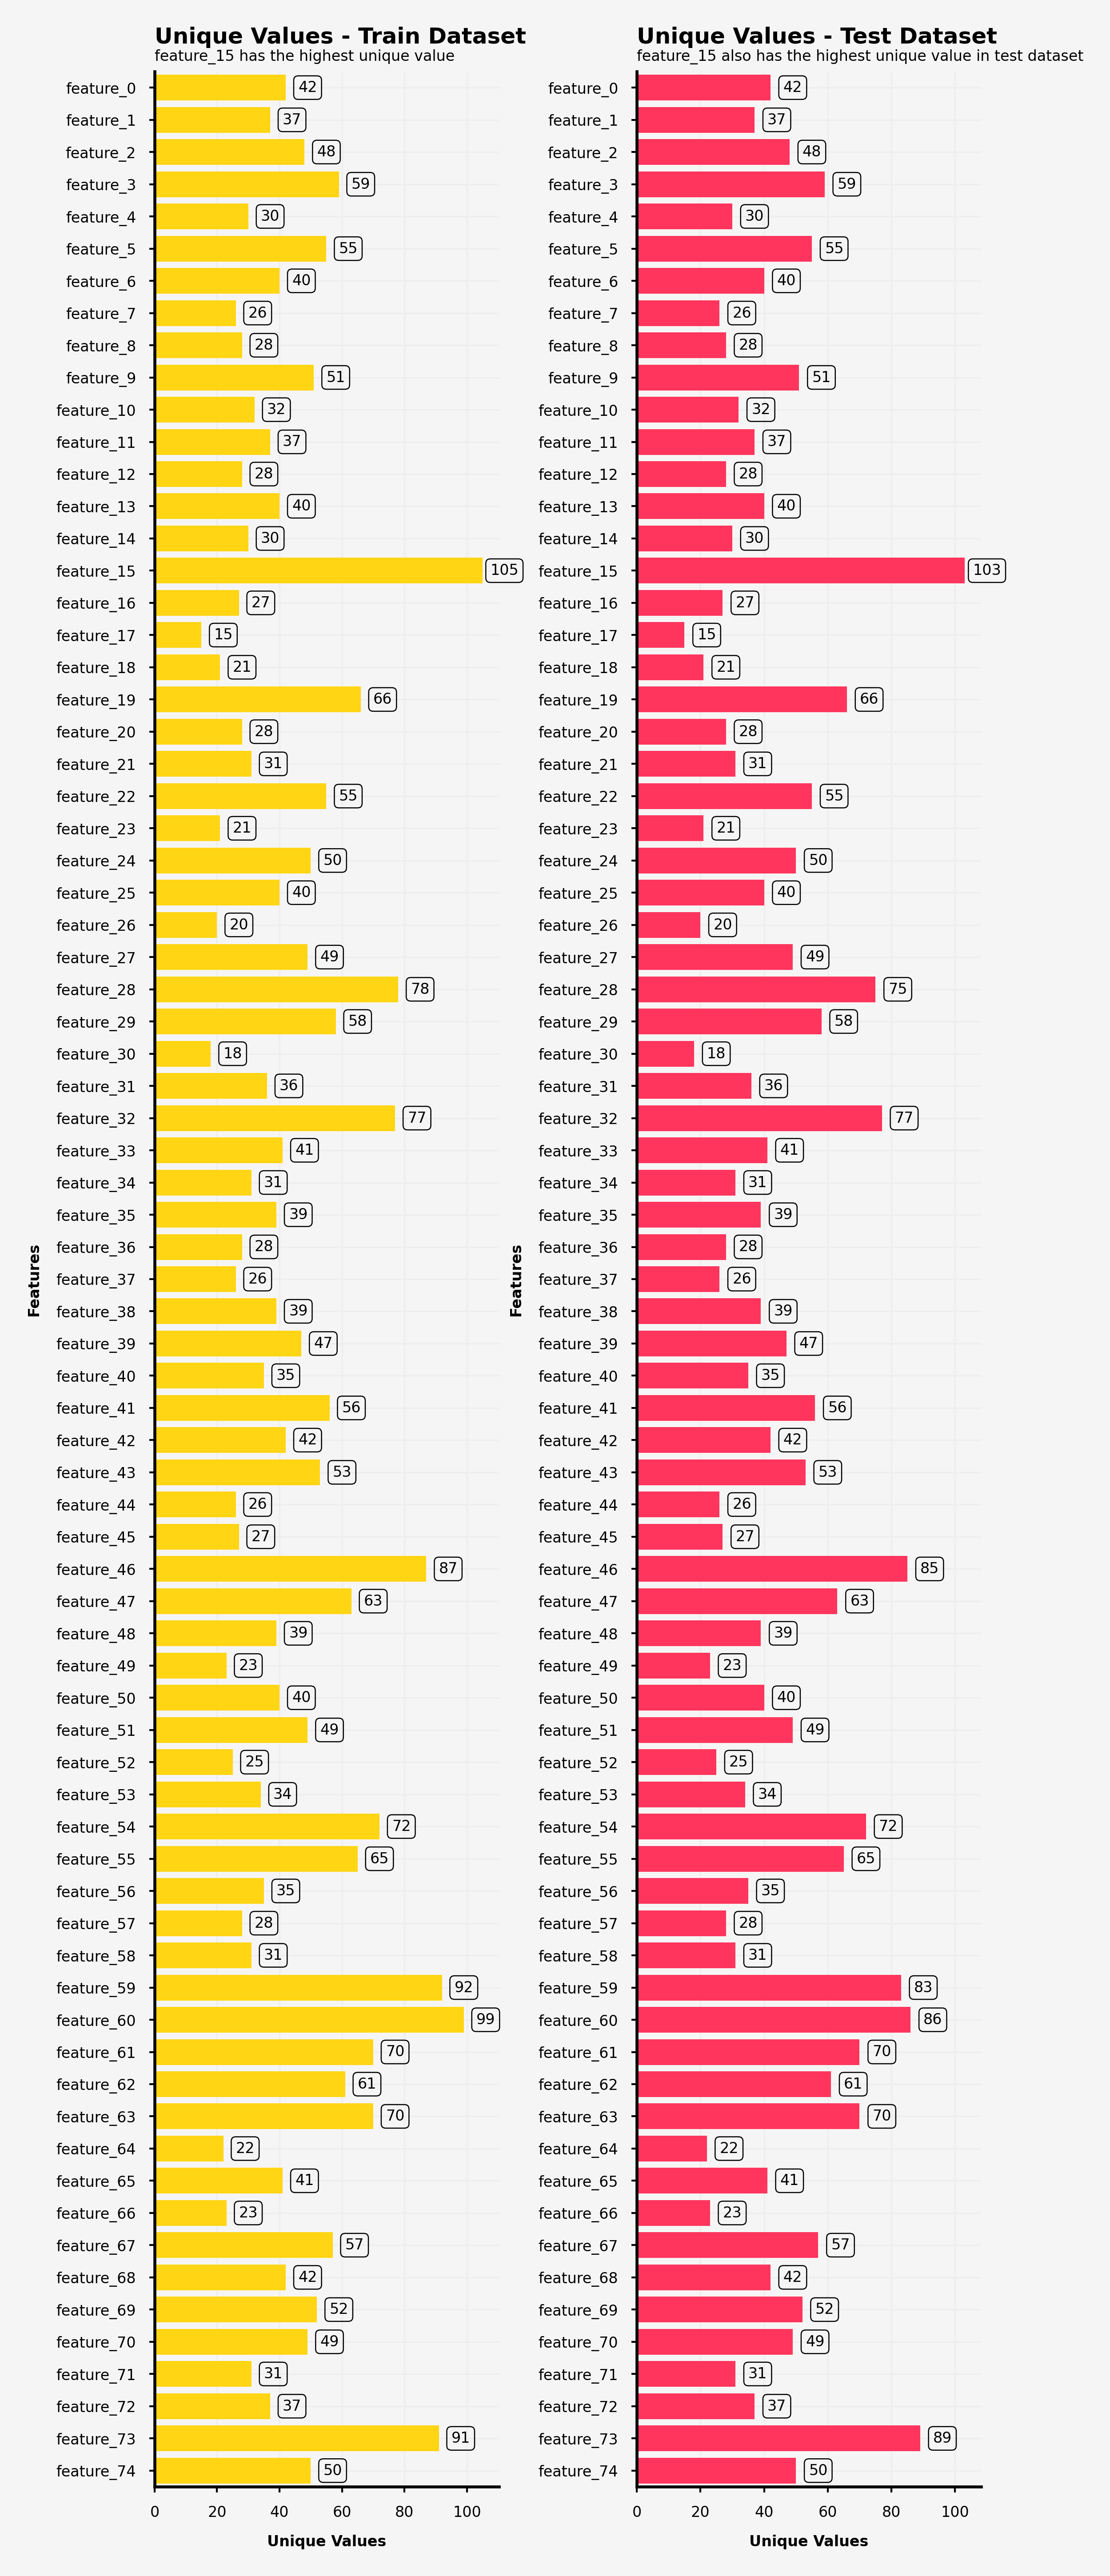

In [15]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(4, 12), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*75)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_value_feature_train['Features'], x=unique_value_feature_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.9, 'Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(0, -1.2, 'feature_15 has the highest unique value', fontsize=4, ha='left', va='top')
# data label
for p in ax0.patches:
    value = f'{p.get_width():.0f}'
    x = p.get_x() + p.get_width() + 7
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*75)

ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.barplot(ax=ax1, y=unique_value_feature_test['Features'], x=unique_value_feature_test['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax1_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax1_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax1_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.text(0, -1.9, 'Unique Values - Test Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax1.text(0, -1.2, 'feature_15 also has the highest unique value in test dataset', fontsize=4, ha='left', va='top')
for p in ax1.patches:
    value = f'{p.get_width():.0f}'
    x = p.get_x() + p.get_width() + 7
    y = p.get_y() + p.get_height() / 2 
    ax1.text(x, y, value, ha='center', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

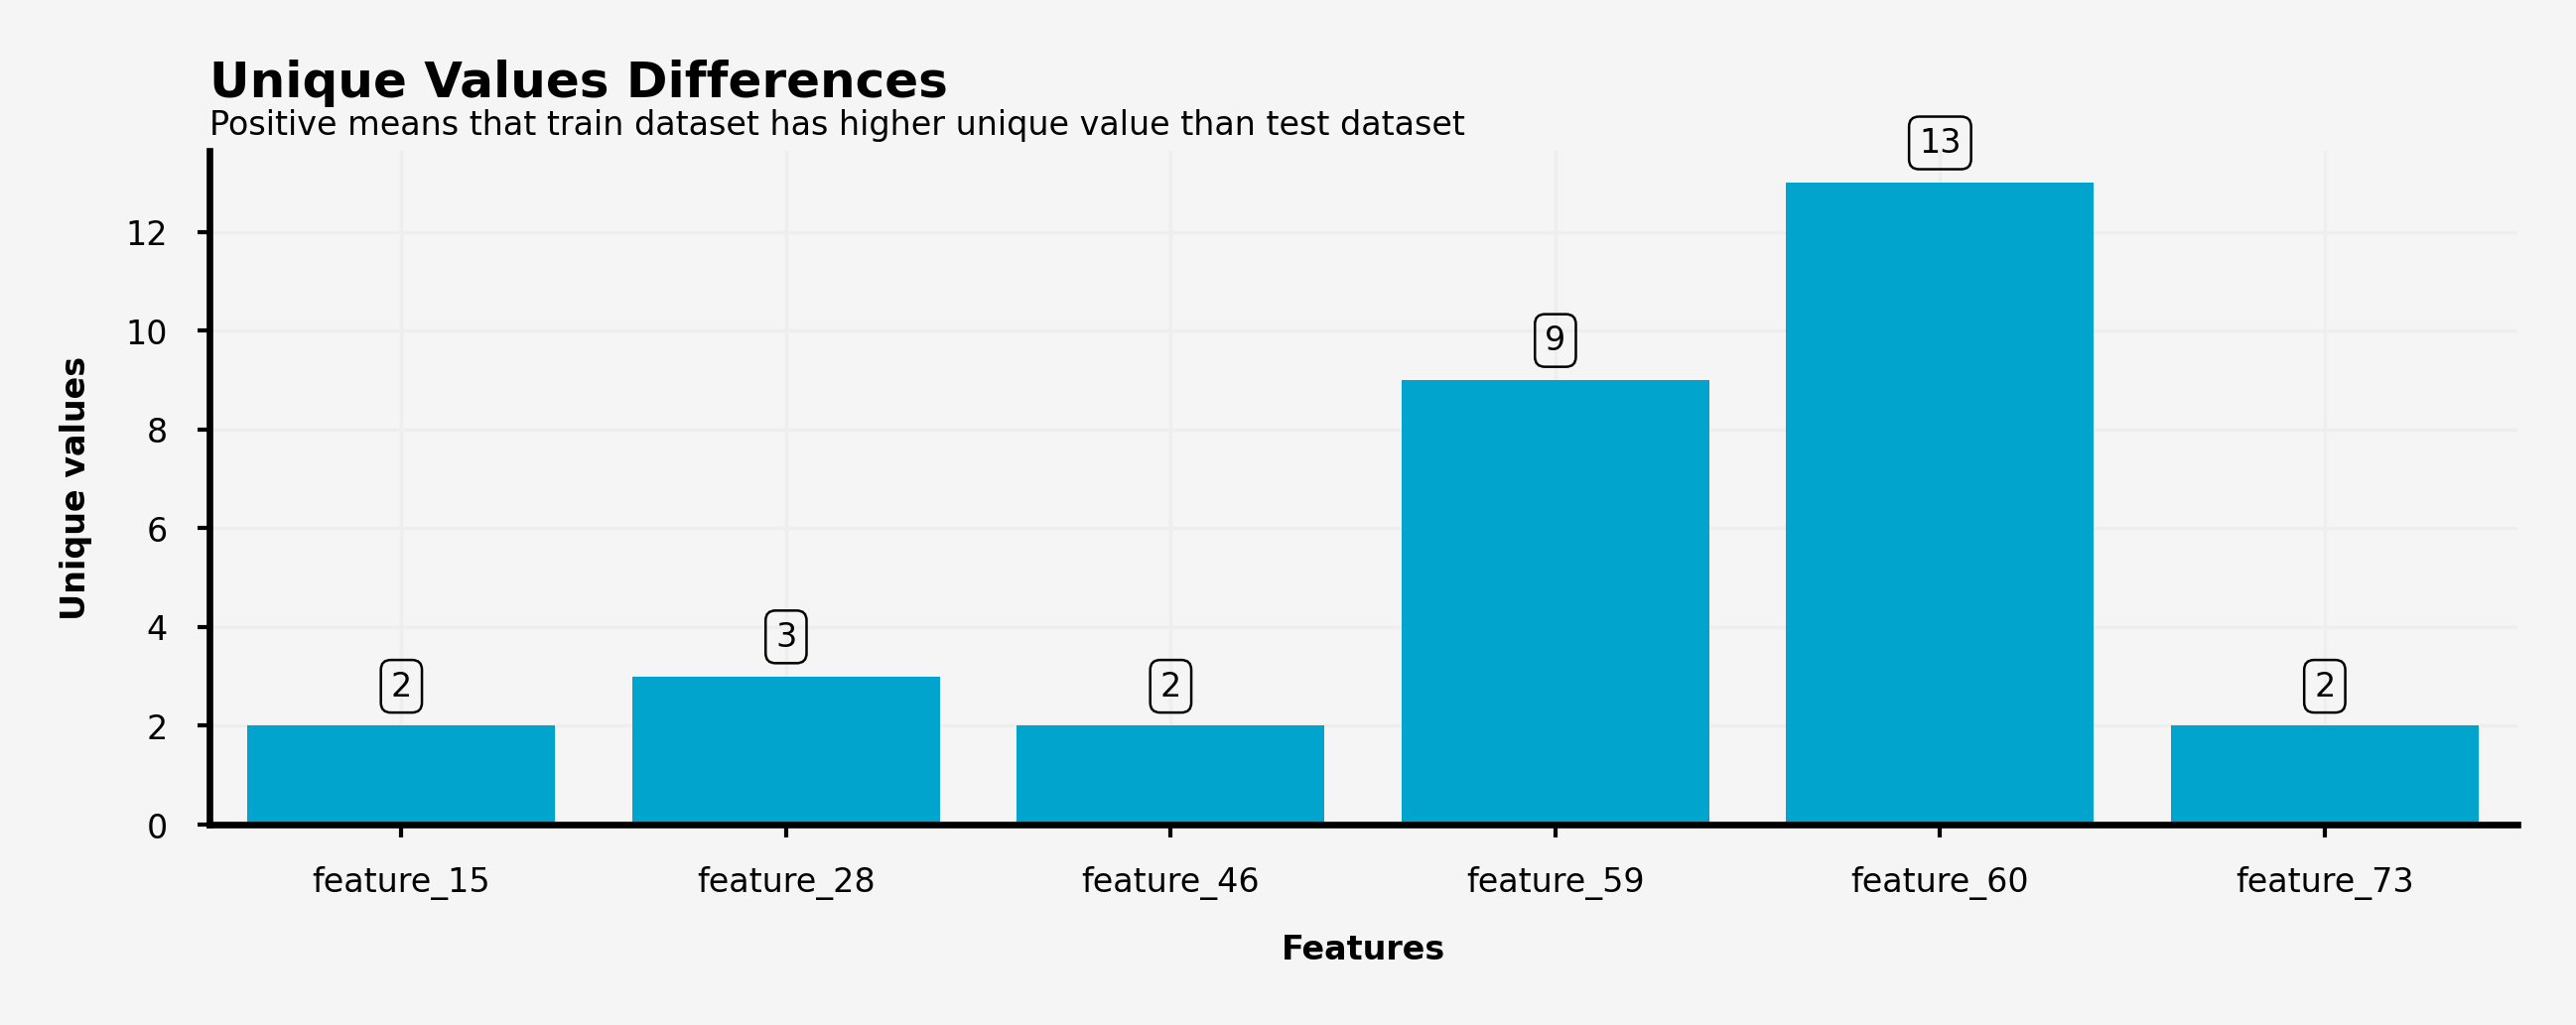

In [16]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 1.5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette(['#00A4CCFF']*6)

ax = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
ax.set_facecolor(background_color)
ax_sns = sns.barplot(ax=ax, x=unique_value_feature_diff['Features'], 
                      y=unique_value_feature_diff['Count'], 
                      zorder=2, linewidth=0, alpha=1, saturation=1)
ax_sns.set_xlabel("Features",fontsize=4, weight='bold')
ax_sns.set_ylabel("Unique values",fontsize=4, weight='bold')
ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax.text(-0.5, 15.5, 'Unique Values Differences', fontsize=6, ha='left', va='top', weight='bold')
ax.text(-0.5, 14.5, 'Positive means that train dataset has higher unique value than test dataset', fontsize=4, ha='left', va='top')
# data label
for p in ax.patches:
    percentage = f'{p.get_height():.0f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.8
    ax.text(x, y, percentage, ha='center', va='center', fontsize=4,
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

### 4.1.4 Individual Values

Taking top 10 of an individual value mean that occurred in a row. Example: calculate how many times the number zero is occured in a row then averaging this number occurance with another sample (row) in the dataset. The purporse is to get sense how each unique values occured in each sample (row).

**Observations:**
- Number zero is dominating the occurrance in every rows on train and test datasets, on average this number occurred 48.5 times from 75 features on train dataset and test dataset.
- In general, the mean occurrance of each value are in descending order where the highest occurance is started from 0.
- The top 10 figures indicated that train and test dataset have a same mean occurance starting from number 0 and ended with number 9.

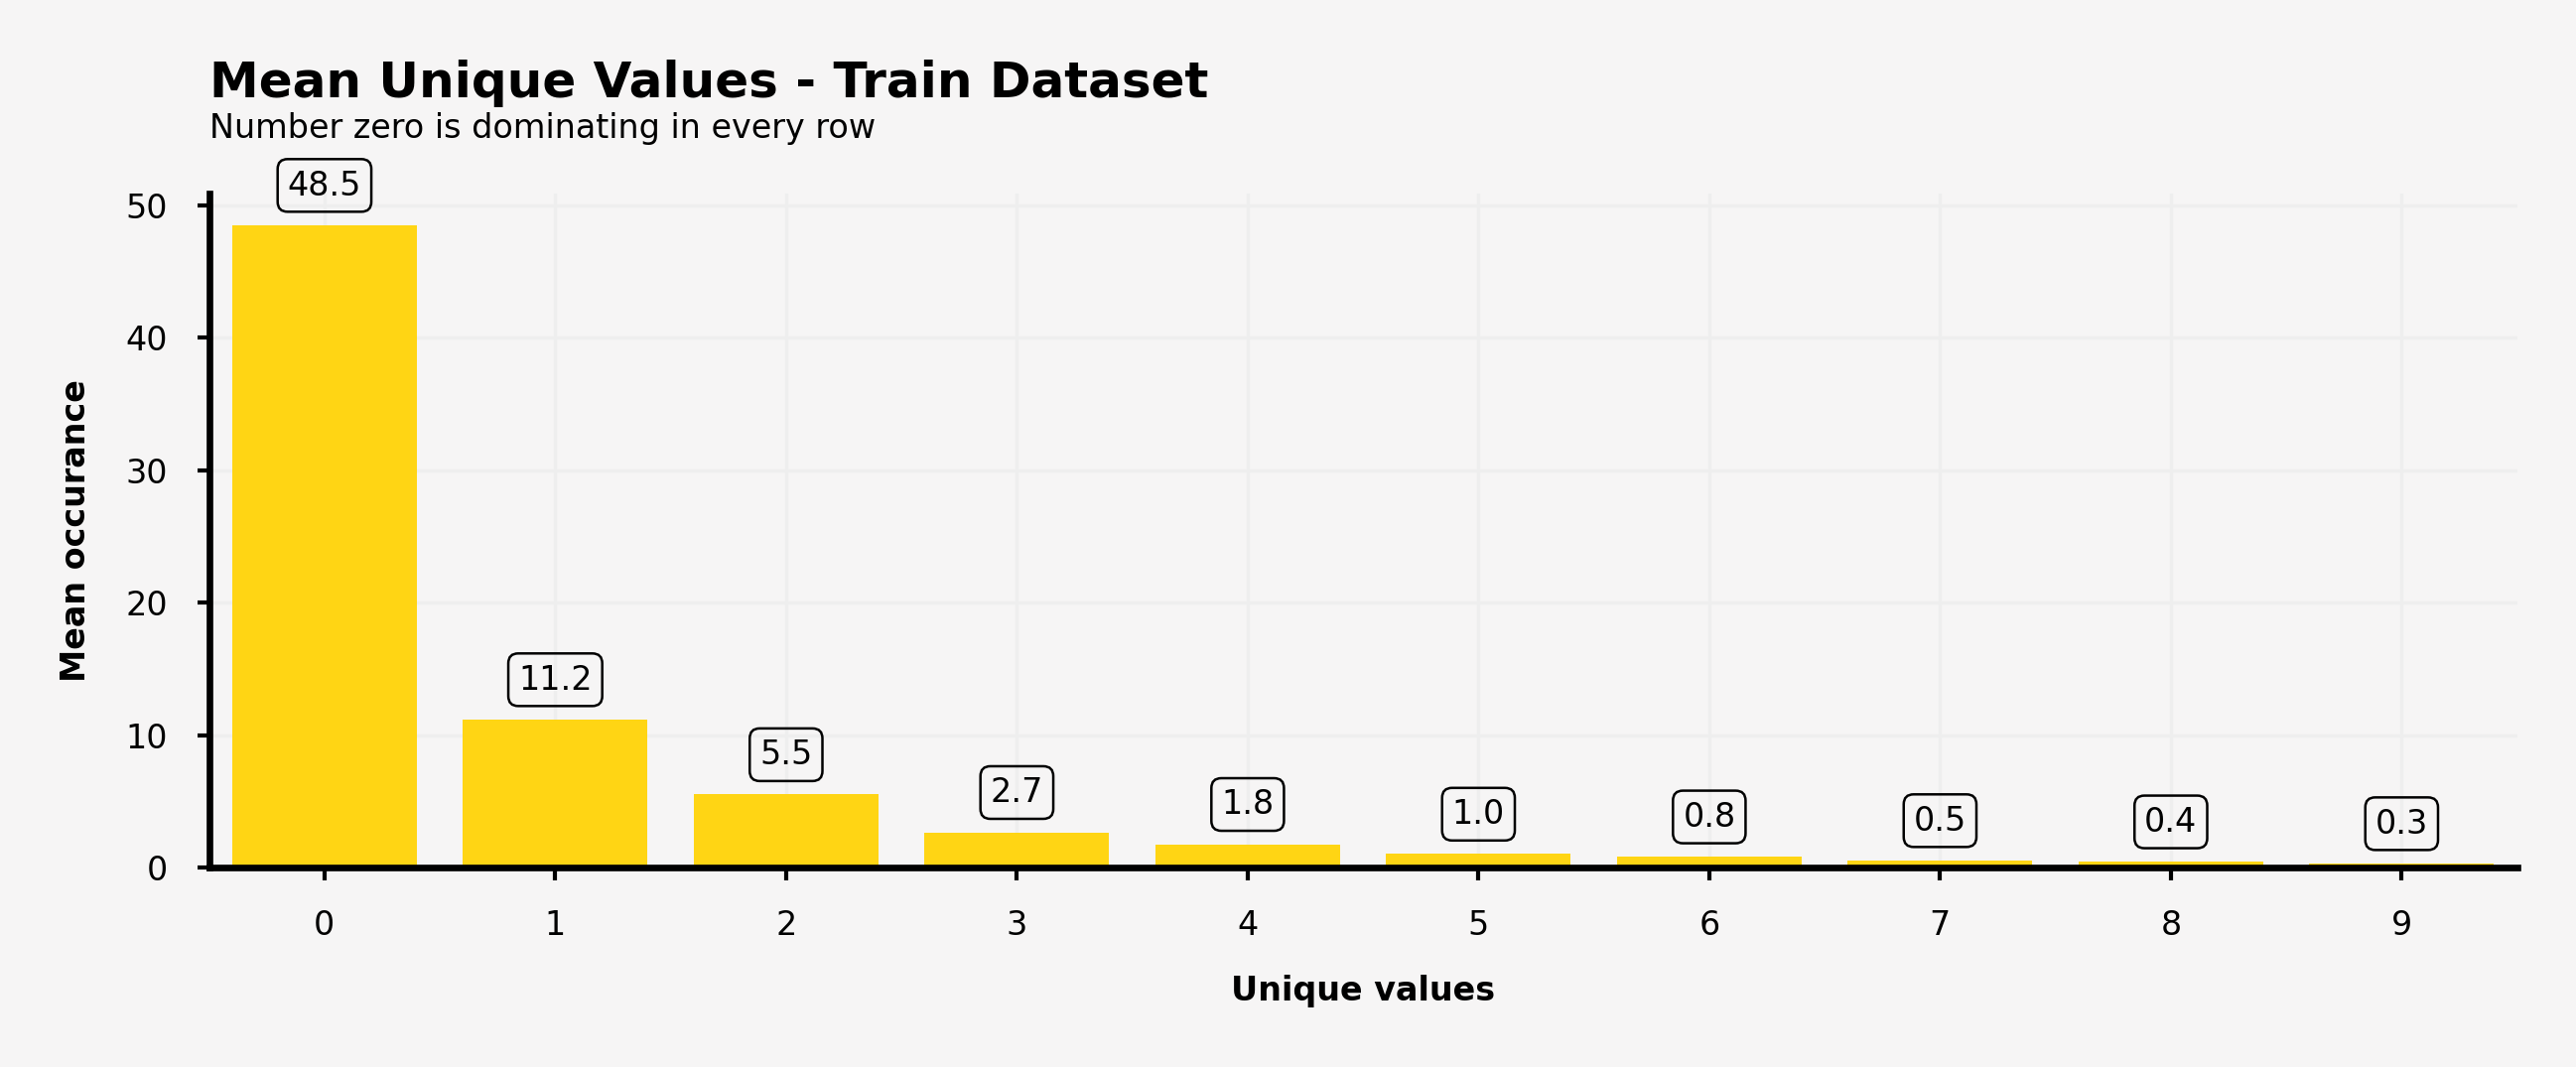

In [17]:
mean_unique_value_train = pd.DataFrame(transpose_features_train.mean(axis=0))
mean_unique_value_train = mean_unique_value_train.reset_index(drop=False)
mean_unique_value_train.columns = ['Unique', 'Mean']
mean_unique_value_train = mean_unique_value_train.sort_values('Mean', ascending=False)[:10]
mean_unique_value_train

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 1.5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*10)

ax = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
ax.set_facecolor(background_color)
ax_sns = sns.barplot(ax=ax, x=mean_unique_value_train['Unique'], 
                      y=mean_unique_value_train['Mean'], 
                      zorder=2, linewidth=0, alpha=1, saturation=1)
ax_sns.set_xlabel("Unique values",fontsize=4, weight='bold')
ax_sns.set_ylabel("Mean occurance",fontsize=4, weight='bold')
ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax.text(-0.5, 61, 'Mean Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax.text(-0.5, 57, 'Number zero is dominating in every row', fontsize=4, ha='left', va='top')
# data label
for p in ax.patches:
    percentage = f'{p.get_height():.1f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 3
    ax.text(x, y, percentage, ha='center', va='center', fontsize=4,
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

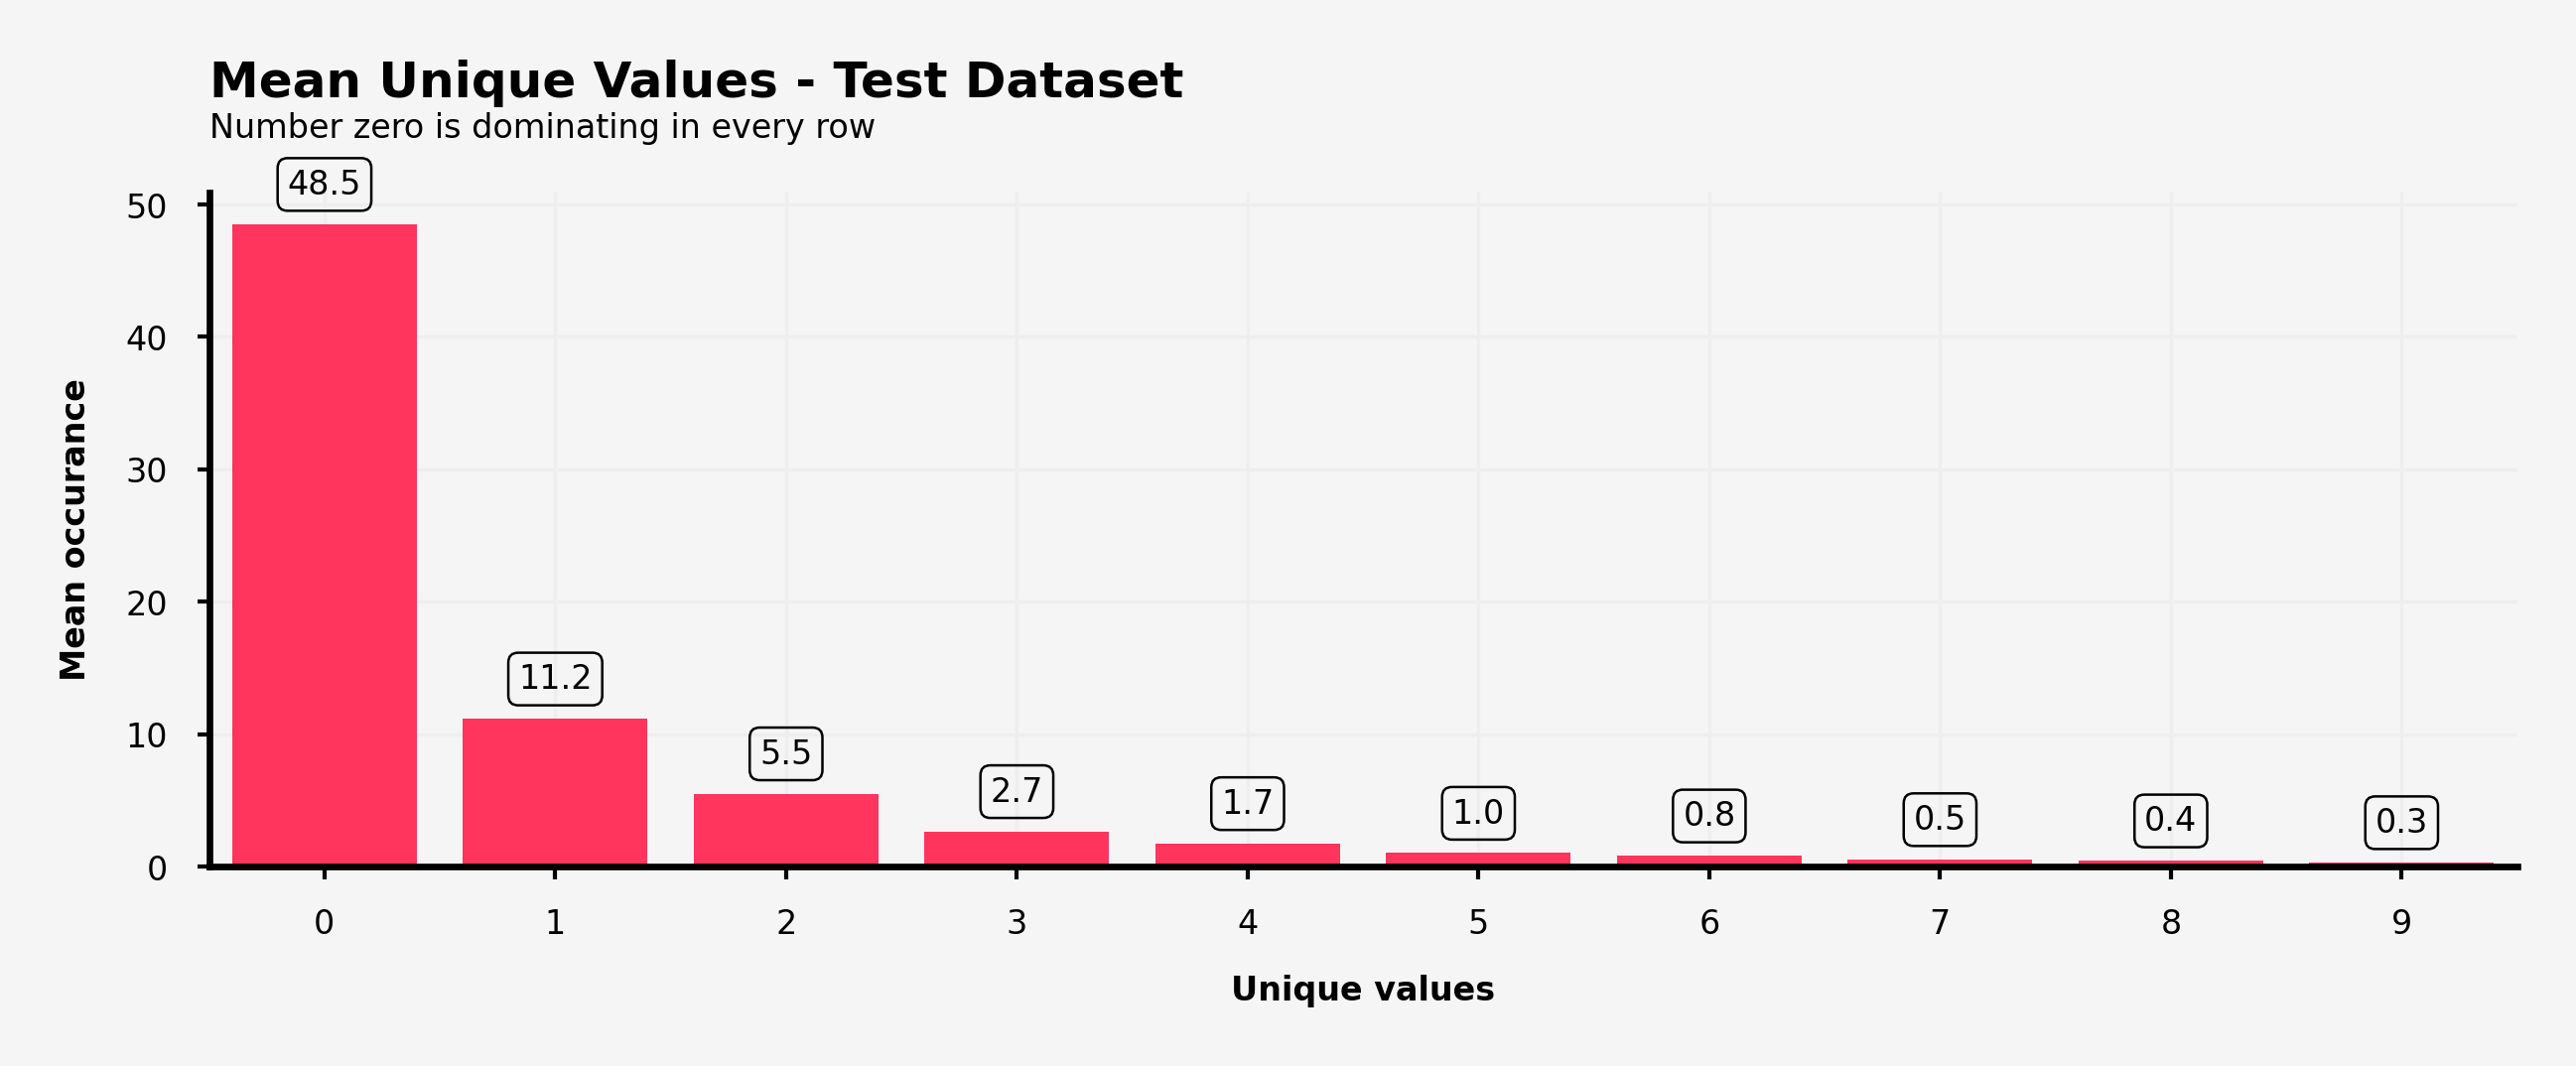

In [18]:
mean_unique_value_test = pd.DataFrame(transpose_features_test.mean(axis=0))
mean_unique_value_test = mean_unique_value_test.reset_index(drop=False)
mean_unique_value_test.columns = ['Unique', 'Mean']
mean_unique_value_test = mean_unique_value_test.sort_values('Mean', ascending=False)[:10]
mean_unique_value_test

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 1.5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*10)

ax = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
ax.set_facecolor(background_color)
ax_sns = sns.barplot(ax=ax, x=mean_unique_value_test['Unique'], 
                      y=mean_unique_value_test['Mean'], 
                      zorder=2, linewidth=0, alpha=1, saturation=1)
ax_sns.set_xlabel("Unique values",fontsize=4, weight='bold')
ax_sns.set_ylabel("Mean occurance",fontsize=4, weight='bold')
ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax.text(-0.5, 61, 'Mean Unique Values - Test Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax.text(-0.5, 57, 'Number zero is dominating in every row', fontsize=4, ha='left', va='top')
# data label
for p in ax.patches:
    percentage = f'{p.get_height():.1f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 3
    ax.text(x, y, percentage, ha='center', va='center', fontsize=4,
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

### 4.1.5 Zero & Positive Individual Values
In general, a row can be divided into two categories: zero and positive numbers and calculated the number of occurance in each row and see the distribution for the whole dataset. 

**Observations:**
- Zero occured more than positive numbers in every rows and have an opposite distribution, both in train and test dataset. 
- There are differences on how many zero and positive numbers occured in train and test dataset. 



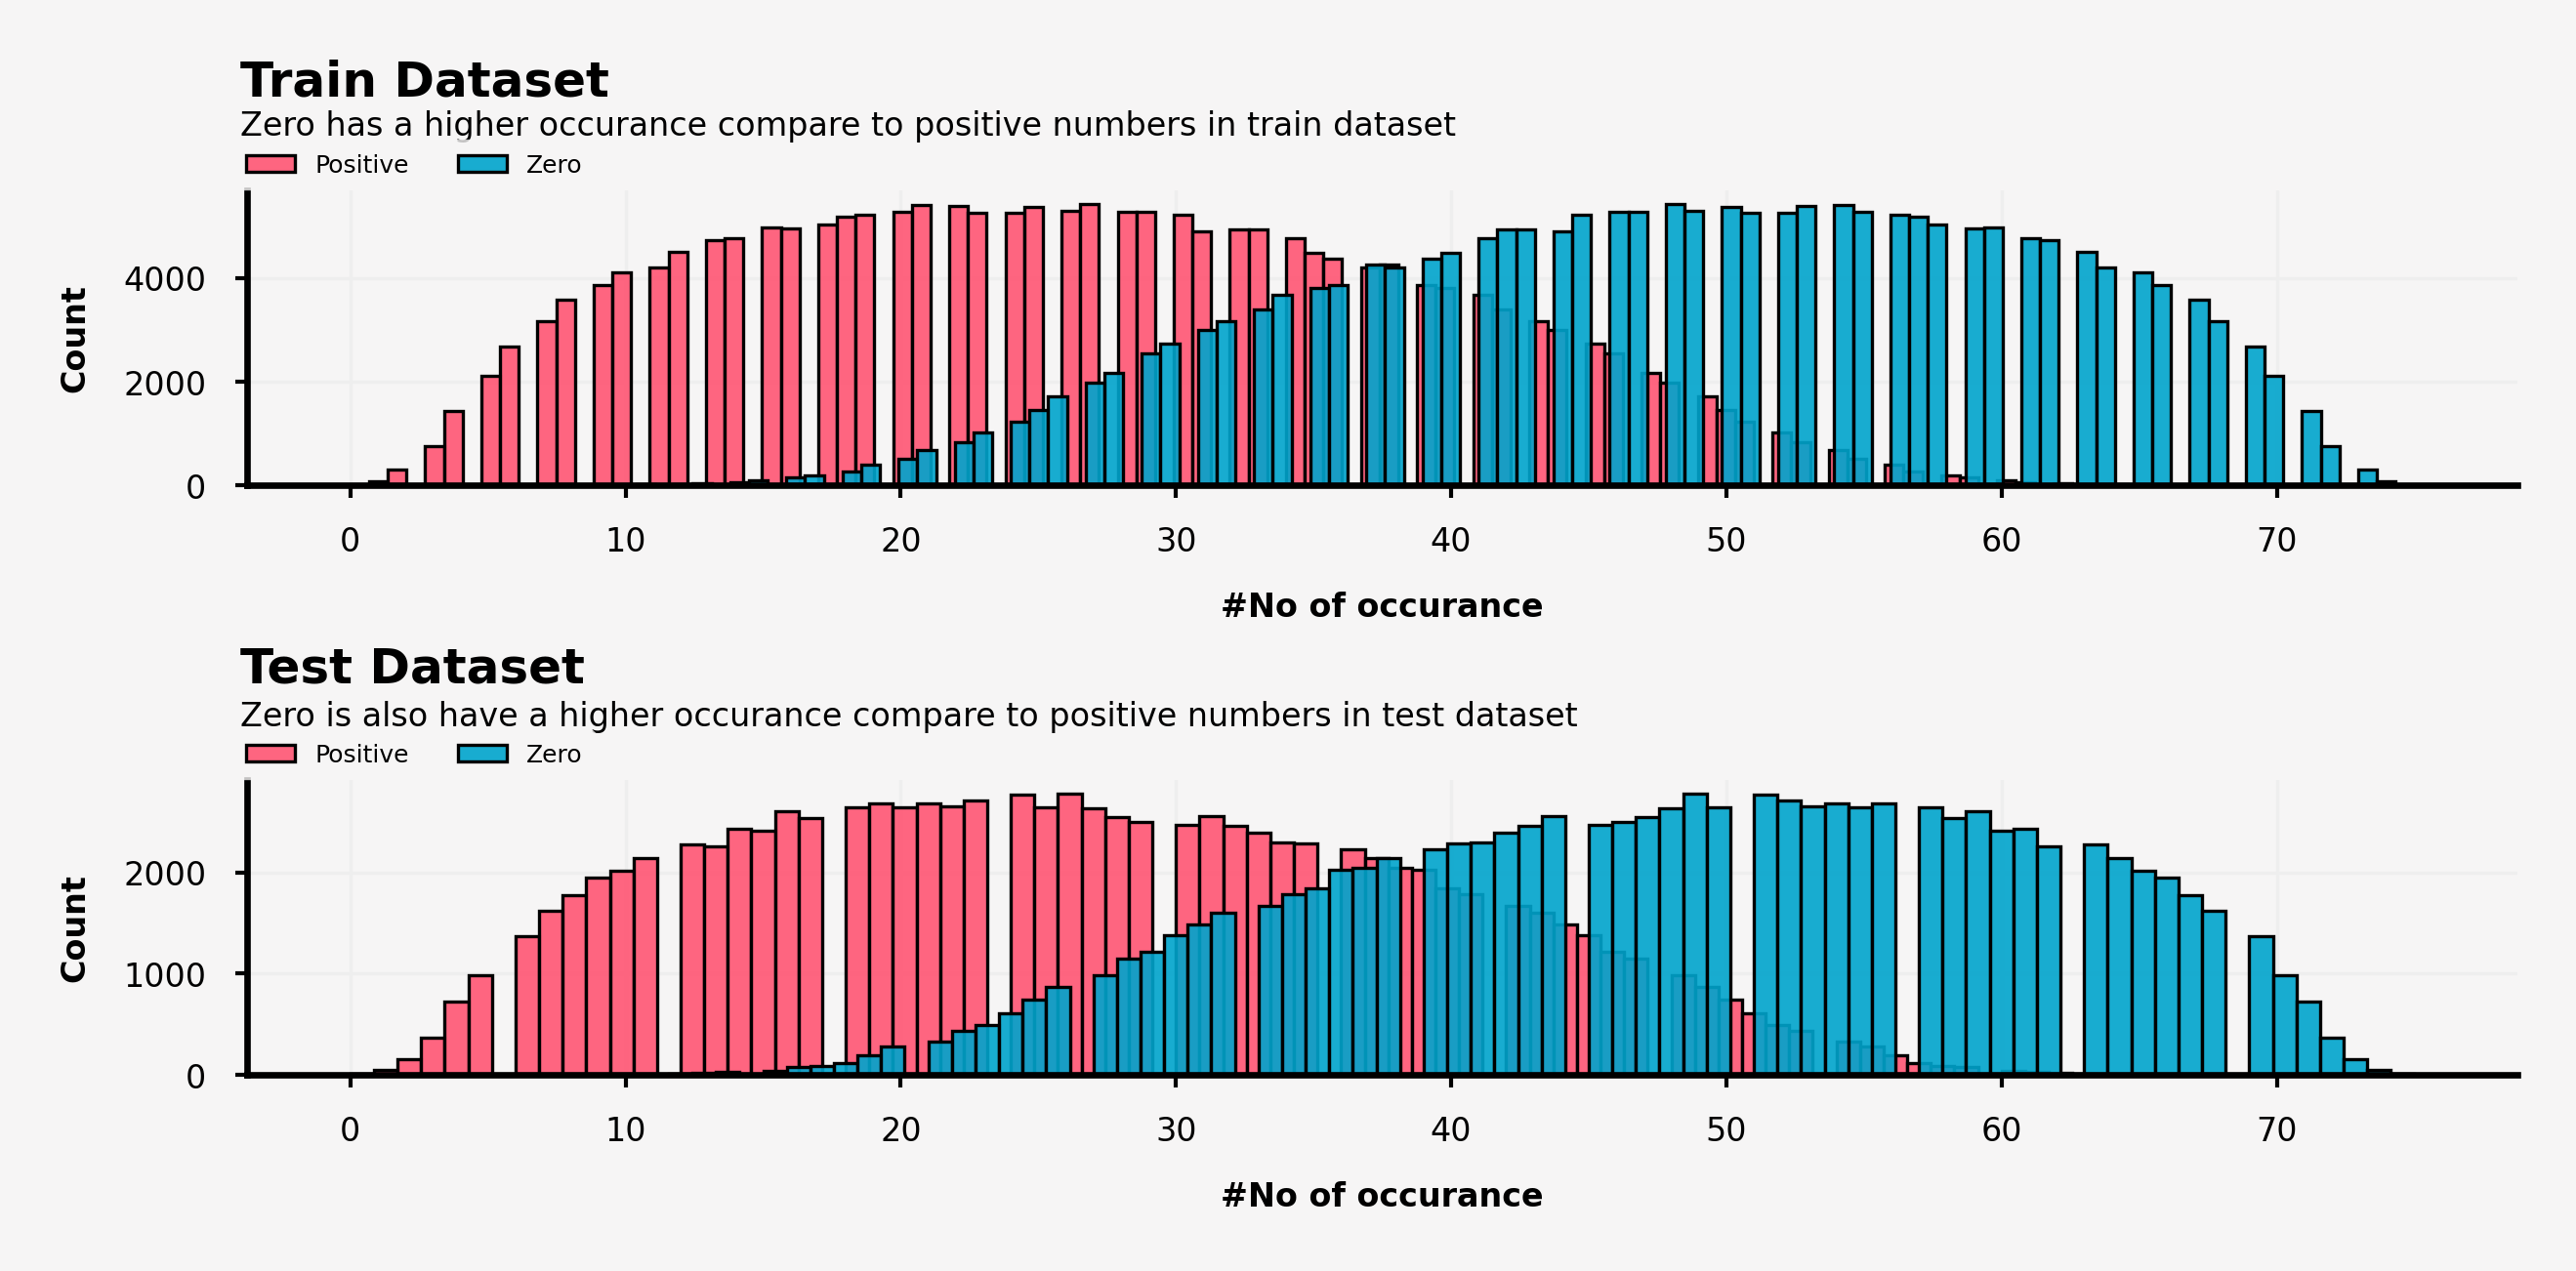

In [19]:
zero_positive_train = pd.DataFrame()
zero_positive_train['zero'] = transpose_features_train.iloc[:, 0]
zero_positive_train['positive'] = transpose_features_train.iloc[:,1:].sum(axis=1)

zero_positive_test = pd.DataFrame()
zero_positive_test['zero'] = transpose_features_test.iloc[:, 0]
zero_positive_test['positive'] = transpose_features_test.iloc[:,1:].sum(axis=1)

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 2), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=1)

background_color = "#f6f5f5"
sns.set_palette(['#00A4CCFF'])

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.histplot(ax=ax0, x=zero_positive_train['positive'], zorder=2, color='#ff5573', linewidth=0.4, alpha=0.9)
ax0_sns = sns.histplot(ax=ax0, x=zero_positive_train['zero'], zorder=2, linewidth=0.4, alpha=0.9)
ax0_sns.set_xlabel("#No of occurance",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0.text(-4, 8250, 'Train Dataset ', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(-4, 7250, 'Zero has a higher occurance compare to positive numbers in train dataset', fontsize=4, ha='left', va='top')
ax0_sns.legend(['Positive', 'Zero'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=3, bbox_to_anchor=(-0.01, 1.2), loc='upper left')
ax0_sns.set_ylabel("Count",fontsize=4, weight='bold')
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

ax1 = fig.add_subplot(gs[1, 0])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.histplot(ax=ax1, x=zero_positive_test['positive'], zorder=2, color='#ff5573', linewidth=0.4, alpha=0.9)
ax1_sns = sns.histplot(ax=ax1, x=zero_positive_test['zero'], zorder=2, linewidth=0.4, alpha=0.9)
ax1_sns.set_xlabel("#No of occurance",fontsize=4, weight='bold')
ax1_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax1.text(-4, 4250, 'Test Dataset ', fontsize=6, ha='left', va='top', weight='bold')
ax1.text(-4, 3700, 'Zero is also have a higher occurance compare to positive numbers in test dataset', fontsize=4, ha='left', va='top')
ax1_sns.legend(['Positive', 'Zero'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=3, bbox_to_anchor=(-0.01, 1.2), loc='upper left')
ax1_sns.set_ylabel("Count",fontsize=4, weight='bold')
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

plt.show()

[back to top](#table-of-contents)
<a id="4.2"></a>
## 4.2 Distribution
Showing top 5 unique values distribution on each feature assuming the feature is classified as categorical variable. As there are 75 features, it will break down into 25 features for each sections. Top 5 distribution between train and test dataset are quite the same on each others.

### 4.2.1 Train dataset
**Observations:**
- Zero is dominating the occurance with more than 50% of each feature, except for `feature_12`, `feature_18`, `feature_19`, `feature_39`, `feature_43`. `feature_50`, `feature_54` and `feature_56`.
- Top 5 values in each feature has contributed more than 80% of each feature, except for `feature_19`, `feature_43` and `feature_54`.

#### 4.2.1.1 features_0 - features_24
**Observations:**
- Zero is dominating the occurance with more than 50% of each feature, except for `feature_12`, `feature_18`, `feature_19` and `feature_20`.
- Top 5 values in each feature has contributed more than 80% of each feature, except for `feature_19`.





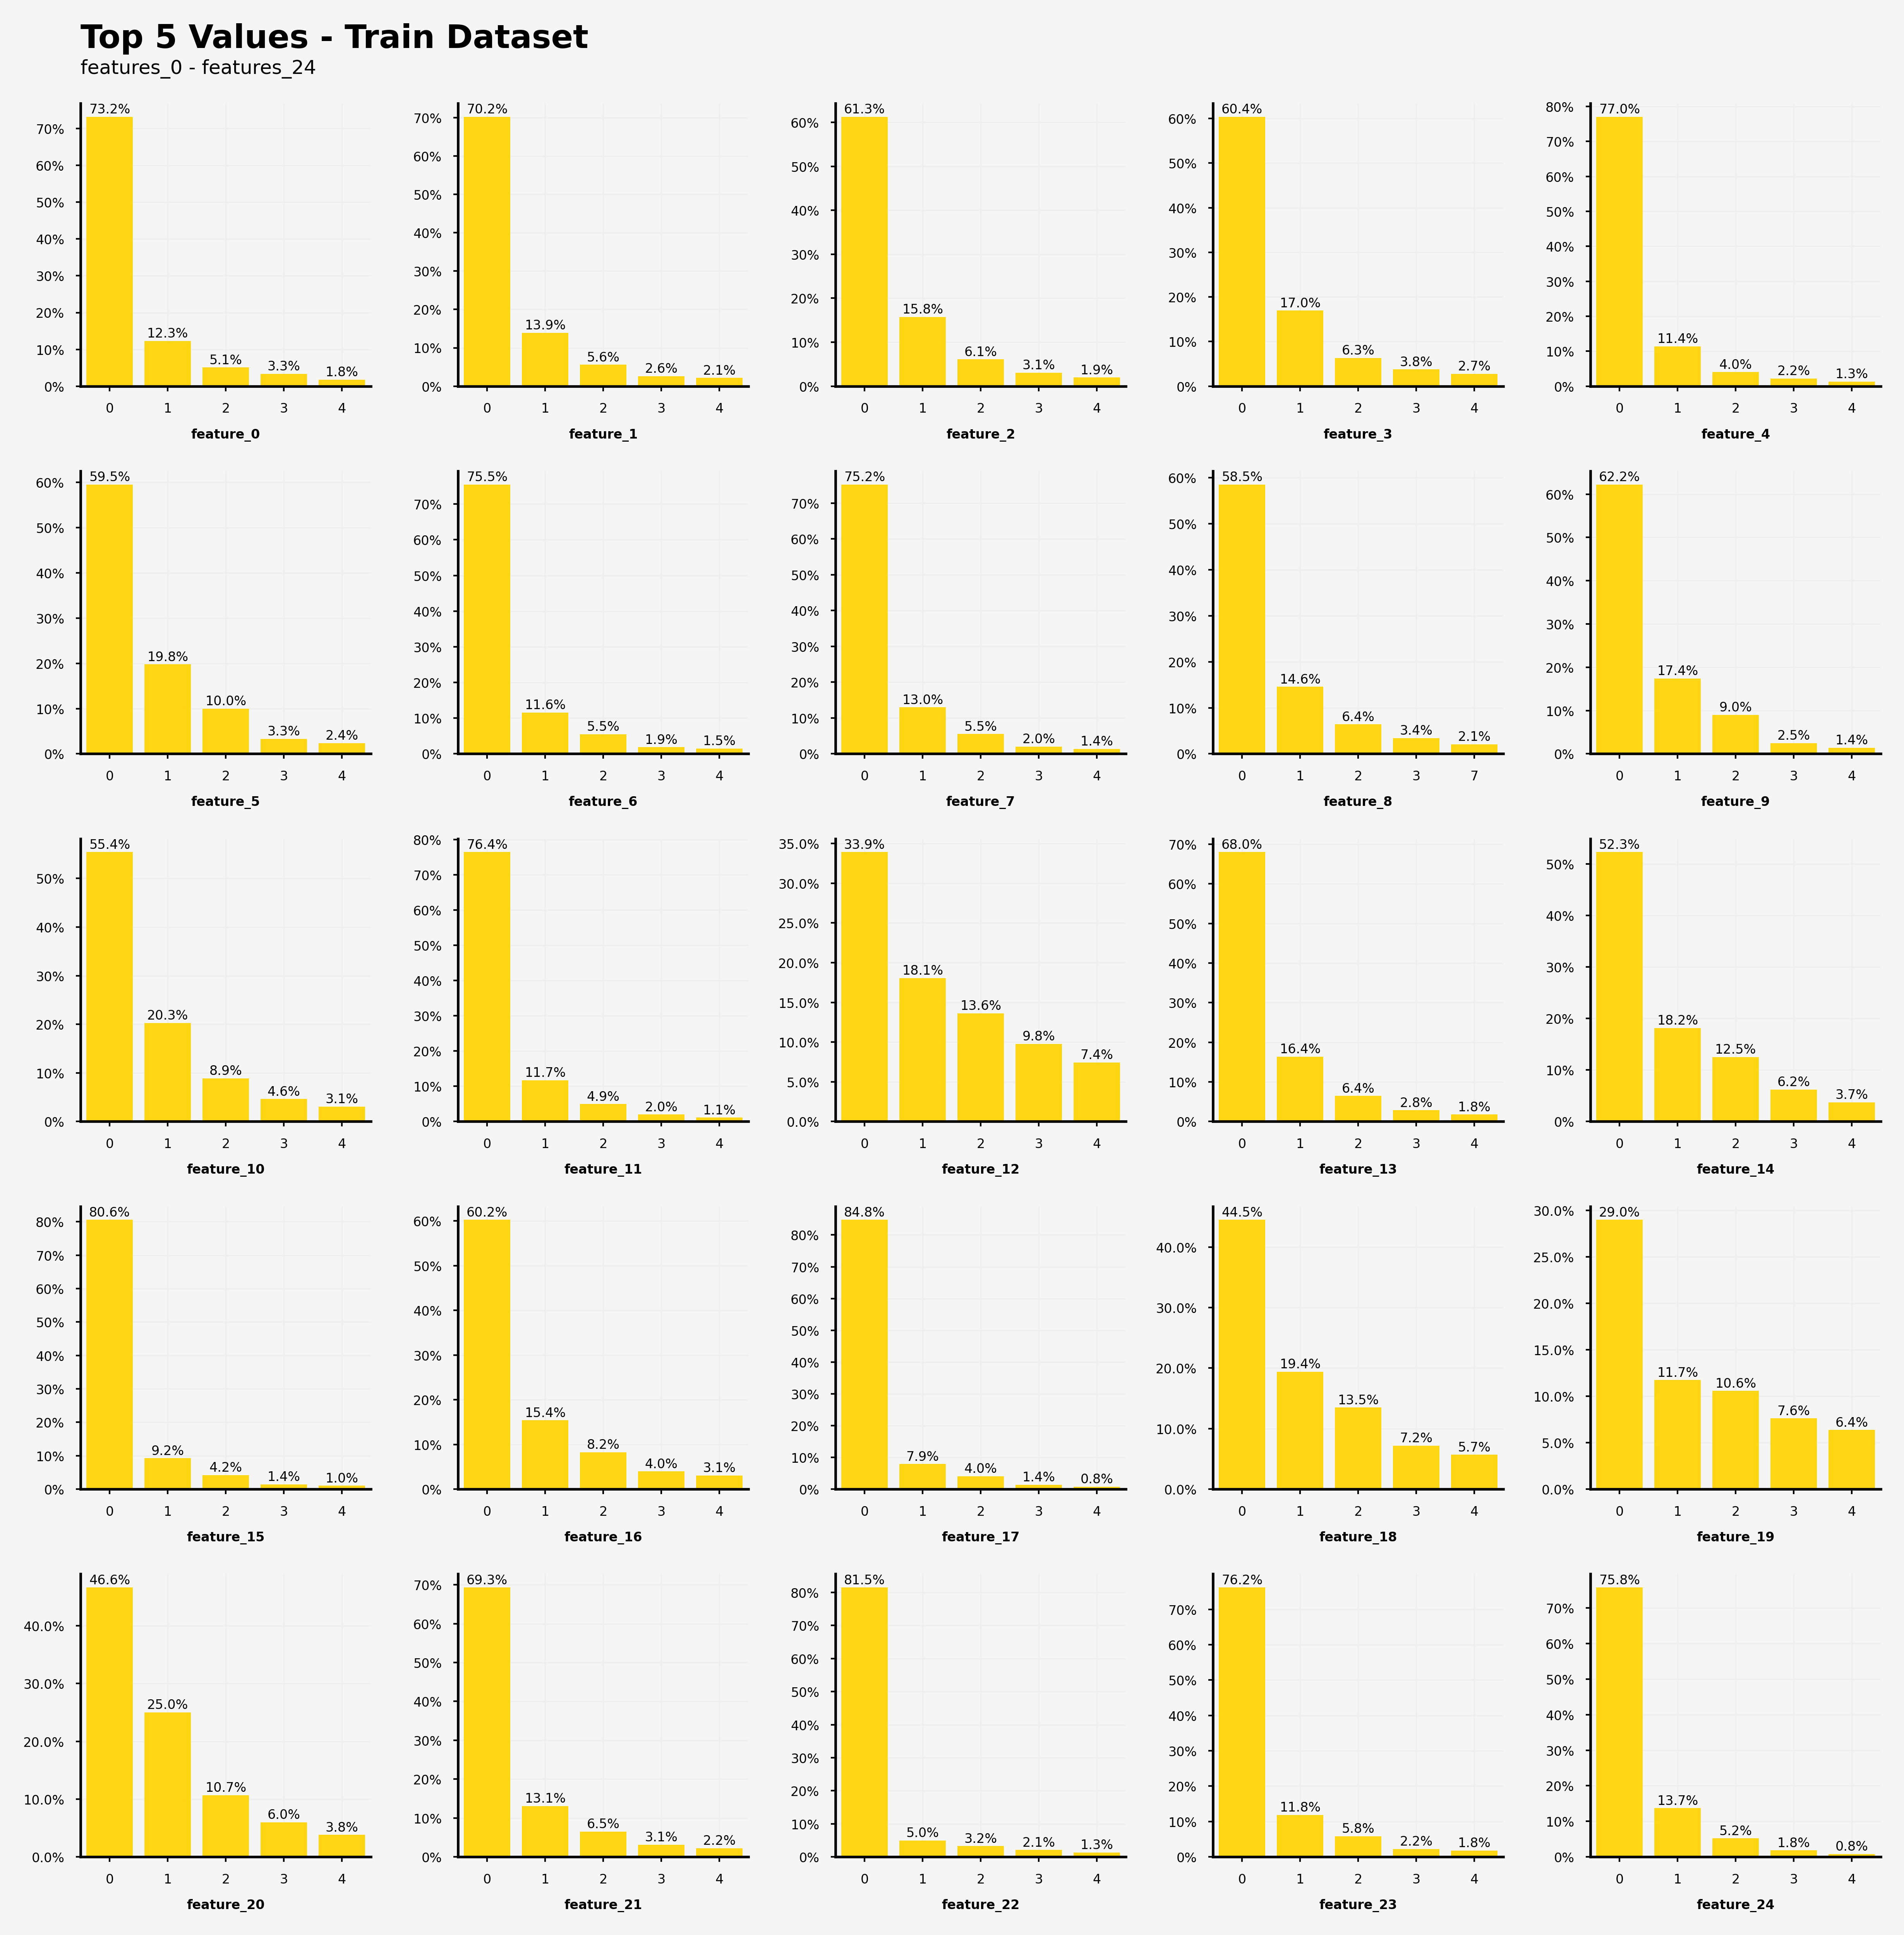

In [20]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*25)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-0.5, 92, 'Top 5 Values - Train Dataset', fontsize=10, fontweight='bold')
ax0.text(-0.5, 85, 'features_0 - features_24', fontsize=6, fontweight='light')        

features = list(train_df.columns[1:26])

run_no = 0
for col in features:
    temp_df = pd.DataFrame(train_df[col].value_counts())[:5]
    temp_df = temp_df.reset_index(drop=False)
    temp_df.columns = ['Number', 'Count']
    sns.barplot(ax=locals()["ax"+str(run_no)],x=temp_df['Number'], y=temp_df['Count']/len(train_df)*100, zorder=2, linewidth=0, alpha=1, saturation=1)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5, length=1.5)
    locals()["ax"+str(run_no)].yaxis.set_major_formatter(ticker.PercentFormatter())
    # data label
    for p in locals()["ax"+str(run_no)].patches:
        percentage = f'{p.get_height():.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        locals()["ax"+str(run_no)].text(x, y, percentage, ha='center', va='center', fontsize=4)

    run_no += 1

plt.show()

#### 4.2.1.2 features_25 - features_49
**Observations:**
- Zero is dominating the occurance with more than 50% of each feature, except for `feature_31`, `feature_39` and `feature_43`.
- Top 5 values in each feature has contributed more than 80% of each feature, except for `feature_43`.




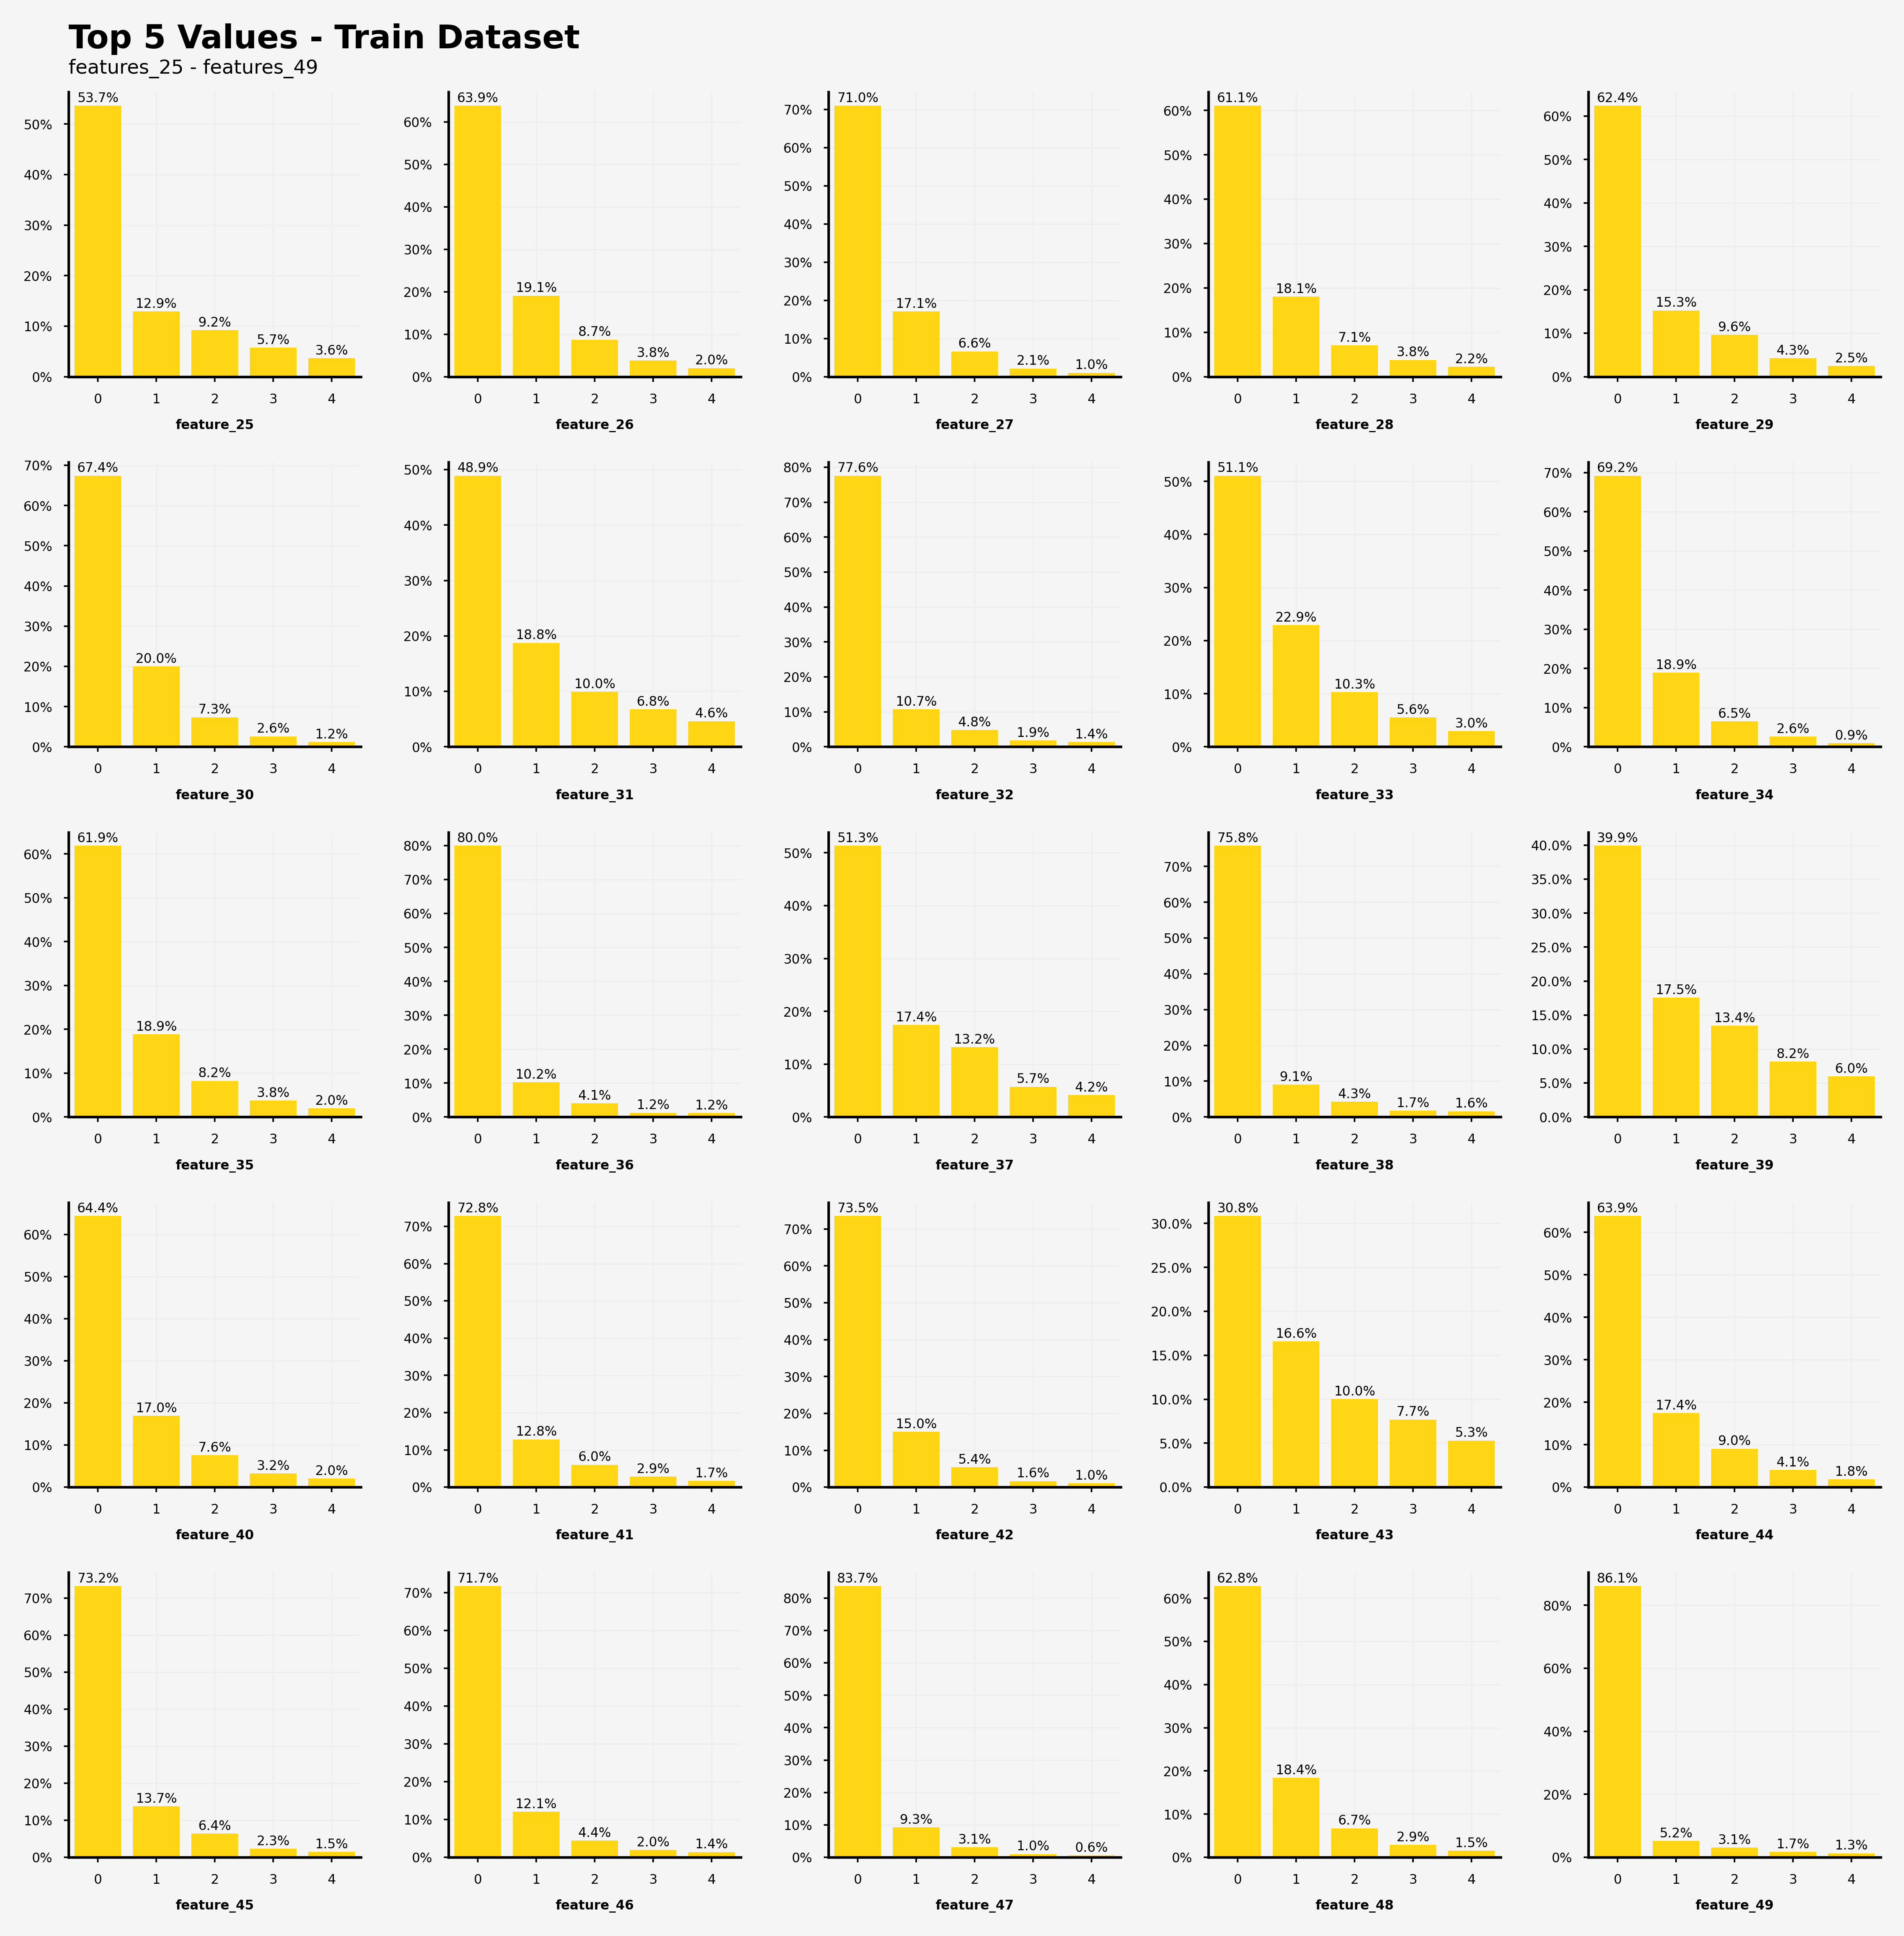

In [21]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*25)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-0.5, 65, 'Top 5 Values - Train Dataset', fontsize=10, fontweight='bold')
ax0.text(-0.5, 60, 'features_25 - features_49', fontsize=6, fontweight='light')        

features = list(train_df.columns[26:51])

run_no = 0
for col in features:
    temp_df = pd.DataFrame(train_df[col].value_counts())[:5]
    temp_df = temp_df.reset_index(drop=False)
    temp_df.columns = ['Number', 'Count']
    sns.barplot(ax=locals()["ax"+str(run_no)],x=temp_df['Number'], y=temp_df['Count']/len(train_df)*100, zorder=2, linewidth=0, alpha=1, saturation=1)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5, length=1.5)
    locals()["ax"+str(run_no)].yaxis.set_major_formatter(ticker.PercentFormatter())
    # data label
    for p in locals()["ax"+str(run_no)].patches:
        percentage = f'{p.get_height():.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        locals()["ax"+str(run_no)].text(x, y, percentage, ha='center', va='center', fontsize=4)

    run_no += 1

plt.show()

#### 4.2.1.3 features_50 - features_74
**Observations:**
- Zero is dominating the occurance with more than 50% of each feature, except for `feature_50`, `feature_54` and `feature_56`.
- Top 5 values in each feature has contributed more than 80% of each feature, except for `feature_54`.



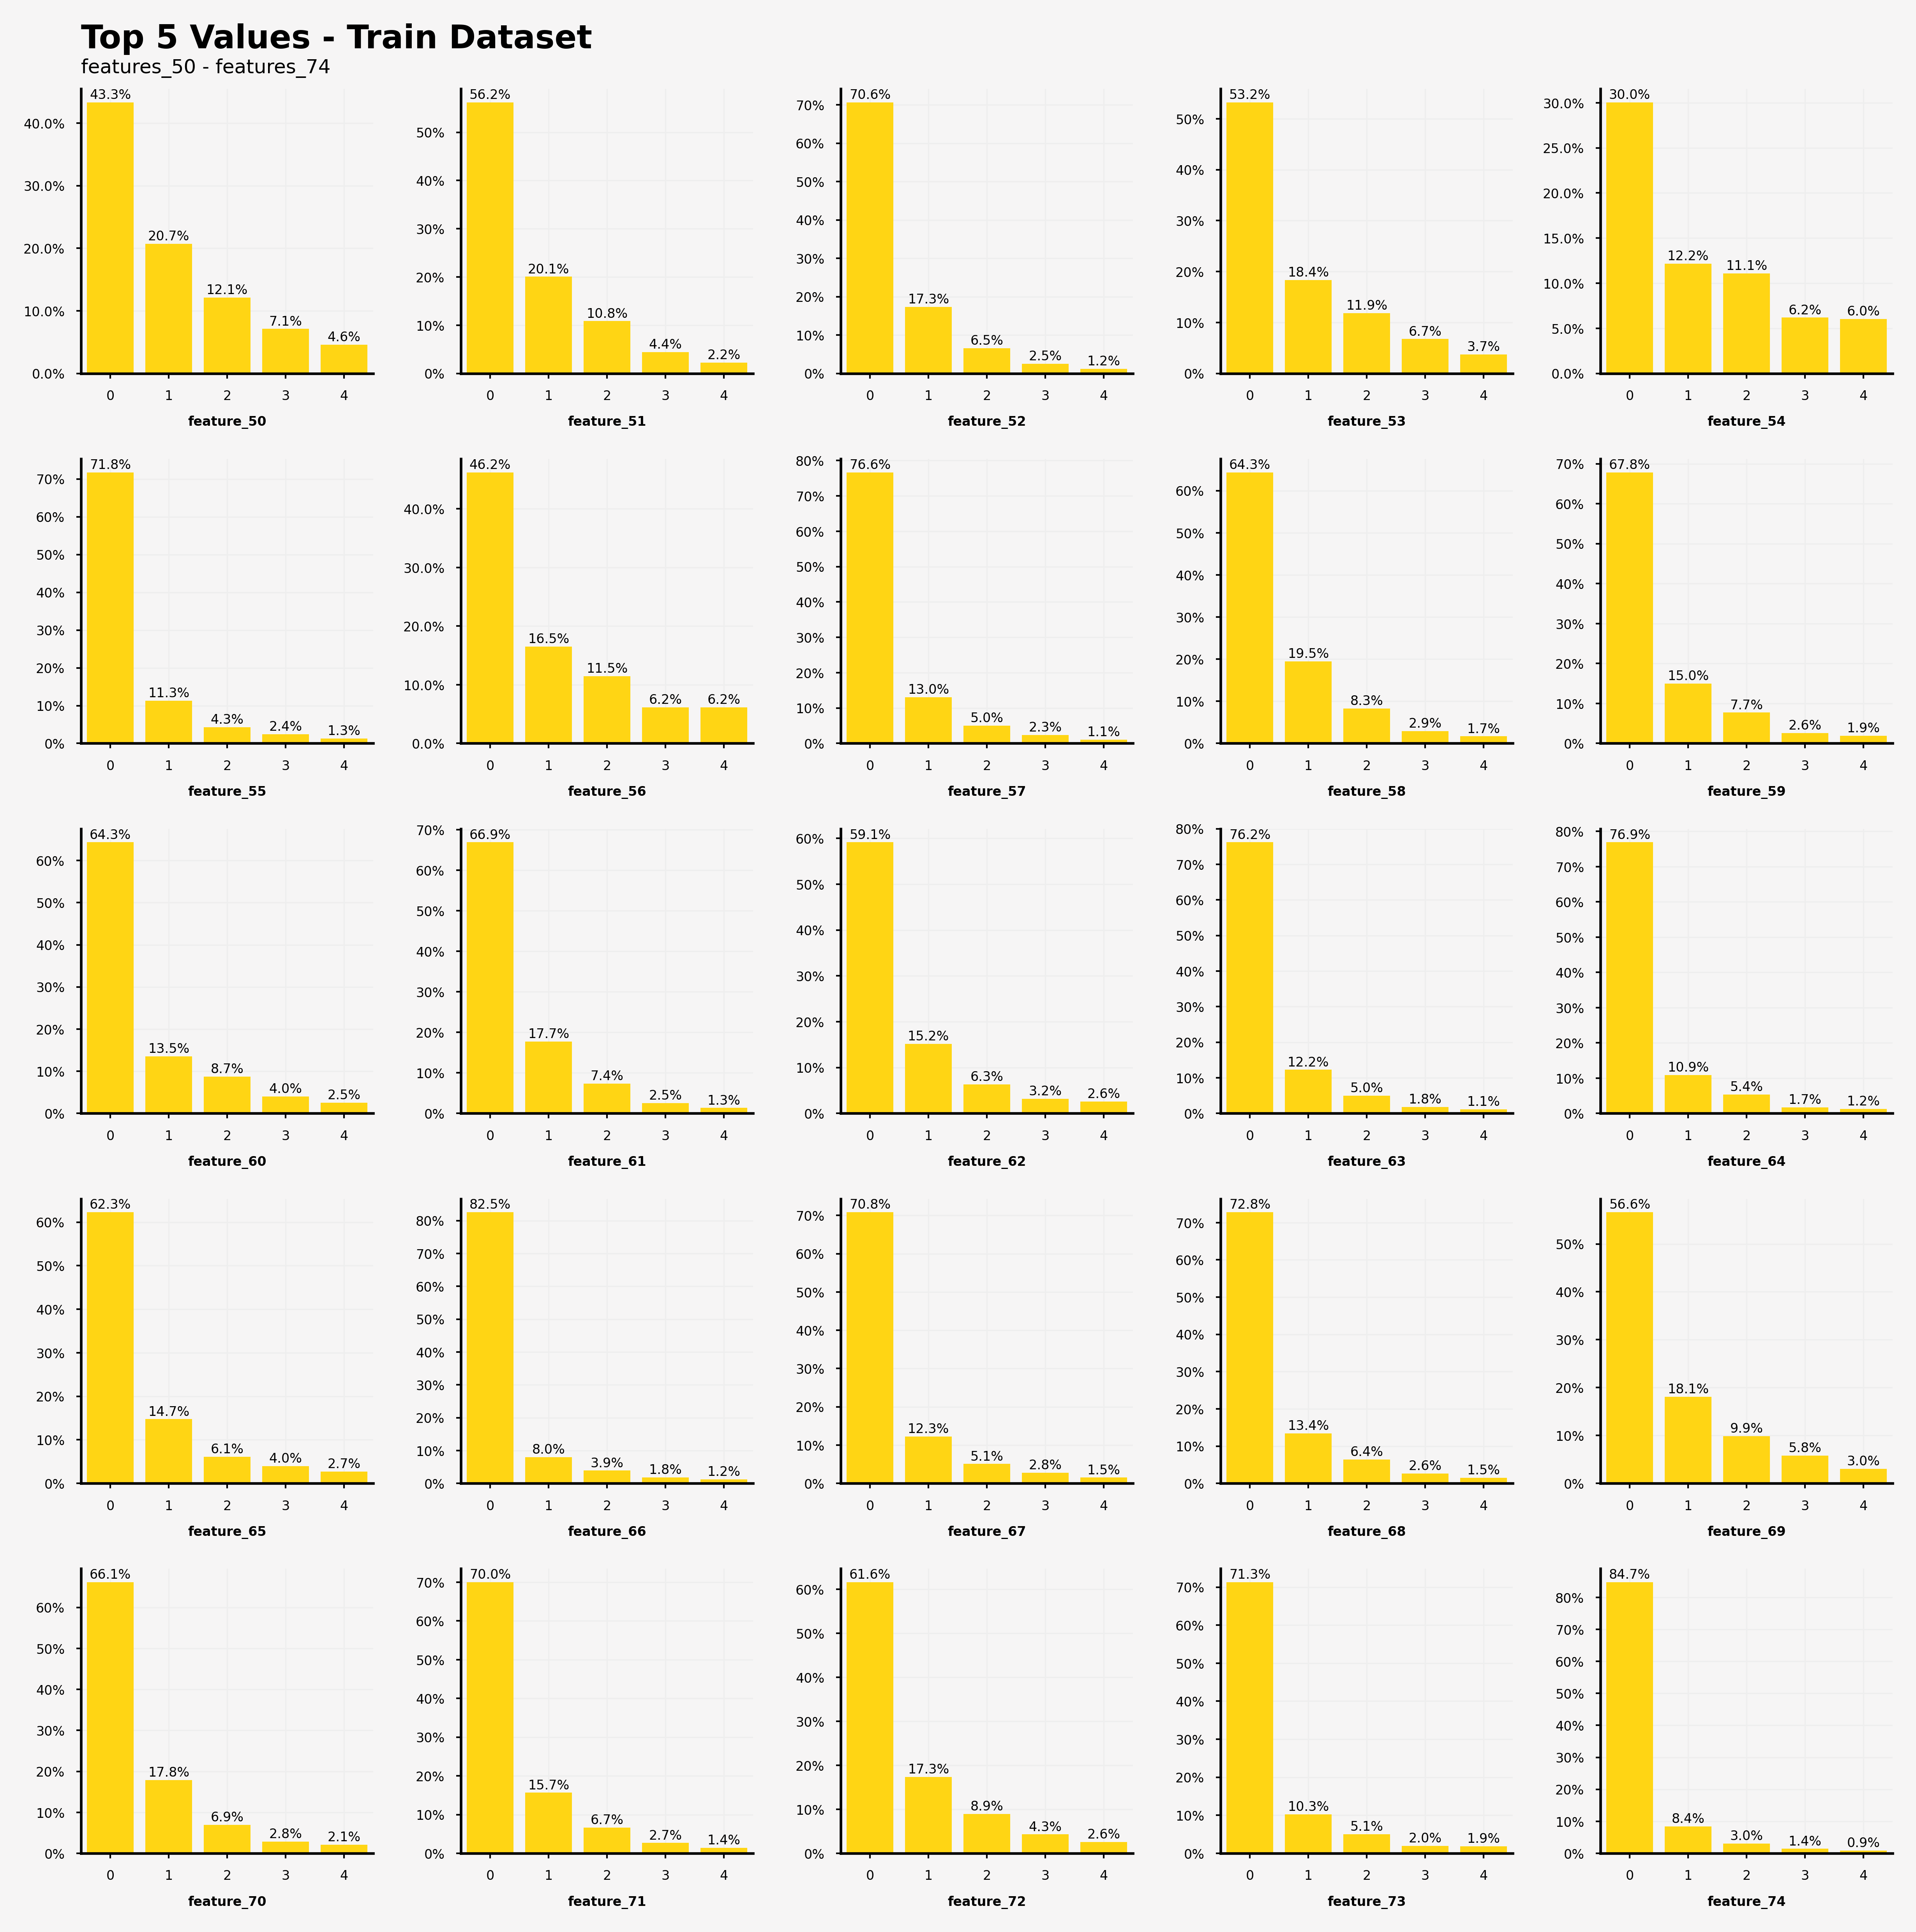

In [22]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*25)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-0.5, 52, 'Top 5 Values - Train Dataset', fontsize=10, fontweight='bold')
ax0.text(-0.5, 48, 'features_50 - features_74', fontsize=6, fontweight='light')        

features = list(train_df.columns[51:76])

run_no = 0
for col in features:
    temp_df = pd.DataFrame(train_df[col].value_counts())[:5]
    temp_df = temp_df.reset_index(drop=False)
    temp_df.columns = ['Number', 'Count']
    sns.barplot(ax=locals()["ax"+str(run_no)],x=temp_df['Number'], y=temp_df['Count']/len(train_df)*100, zorder=2, linewidth=0, alpha=1, saturation=1)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5, length=1.5)
    locals()["ax"+str(run_no)].yaxis.set_major_formatter(ticker.PercentFormatter())
    # data label
    for p in locals()["ax"+str(run_no)].patches:
        percentage = f'{p.get_height():.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        locals()["ax"+str(run_no)].text(x, y, percentage, ha='center', va='center', fontsize=4)

    run_no += 1

plt.show()

### 4.2.2 Test dataset
Train and test dataset have a same observations, below are the repeating observations.

**Observations:**
- Zero is dominating the occurance with more than 50% of each feature, except for `feature_12`, `feature_18`, `feature_19`, `feature_39`, `feature_43`. `feature_50`, `feature_54` and `feature_56`.
- Top 5 values in each feature has contributed more than 80% of each feature, except for `feature_19`, `feature_43` and `feature_54`.

#### 4.2.2.1 features_0 - features_24
`features_0` - `features_24` have a same observations as train dataset, below are the repeating observations.

**Observations:**
- Zero is dominating the occurance with more than 50% of each feature, except for `feature_12`, `feature_18`, `feature_19` and `feature_20`.
- Top 5 values in each feature has contributed more than 80% of each feature, except for `feature_19`.




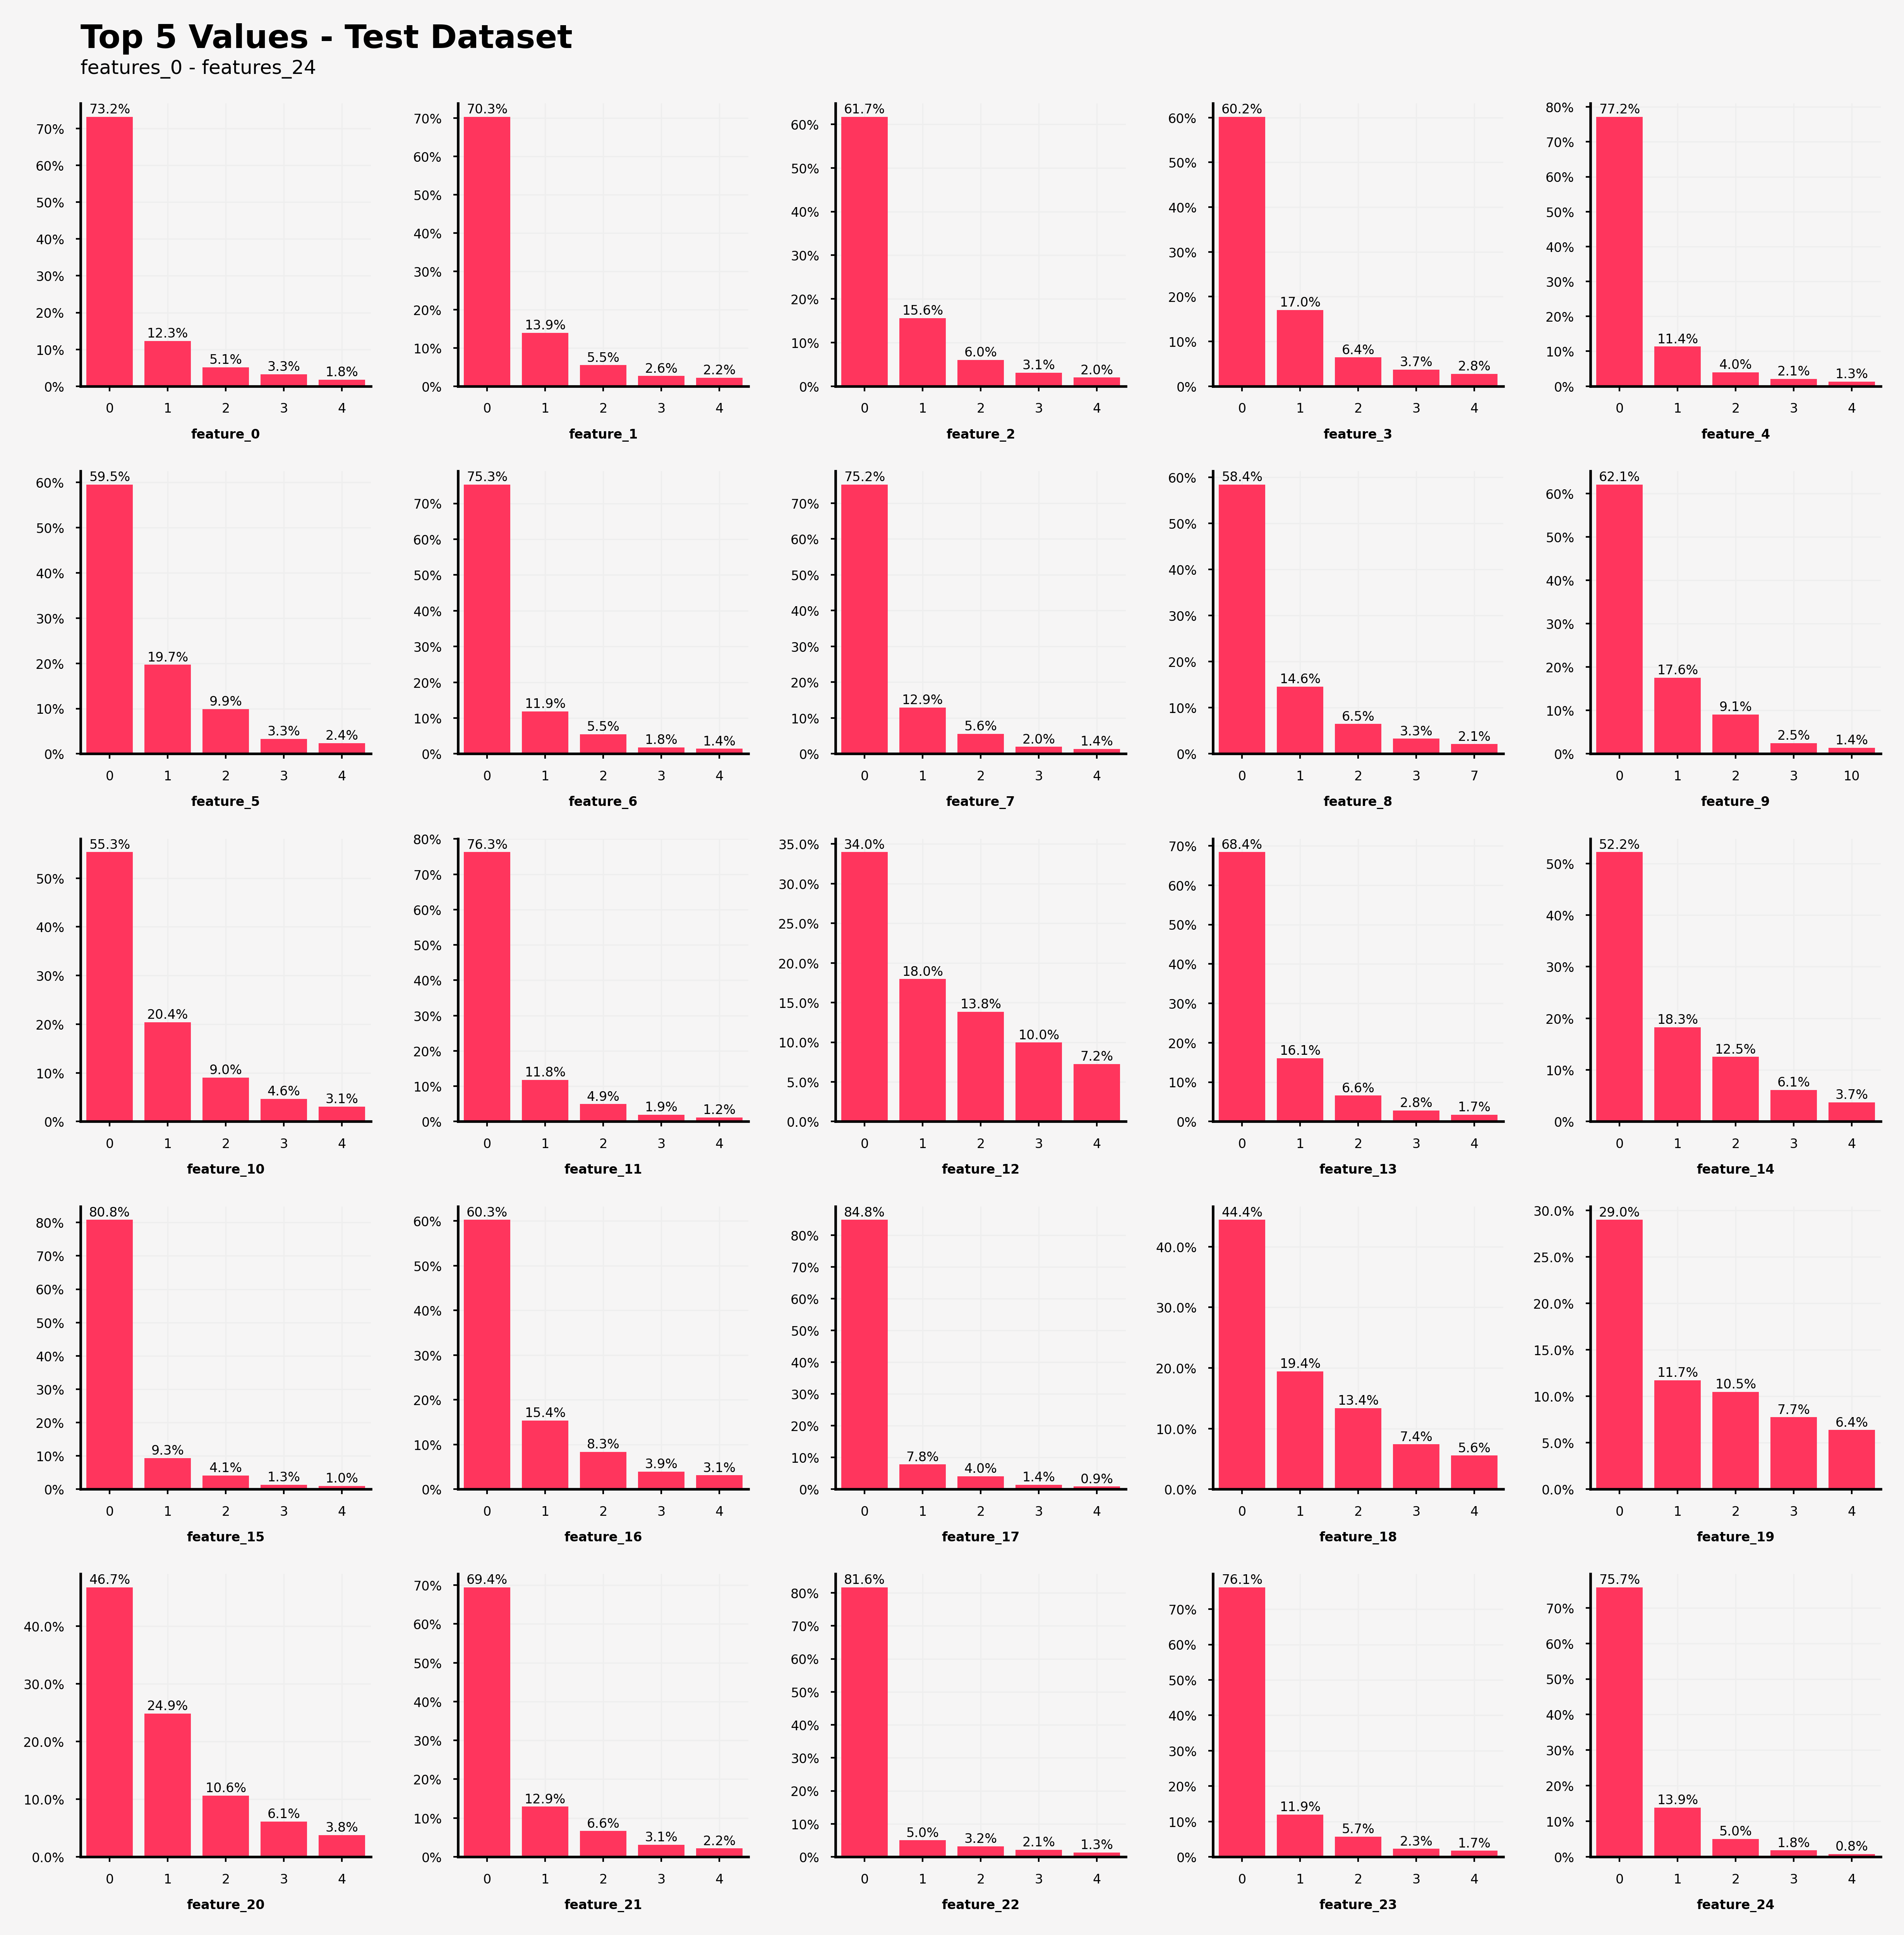

In [23]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*25)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-0.5, 92, 'Top 5 Values - Test Dataset', fontsize=10, fontweight='bold')
ax0.text(-0.5, 85, 'features_0 - features_24', fontsize=6, fontweight='light')        

features = list(test_df.columns[1:26])

run_no = 0
for col in features:
    temp_df = pd.DataFrame(test_df[col].value_counts())[:5]
    temp_df = temp_df.reset_index(drop=False)
    temp_df.columns = ['Number', 'Count']
    sns.barplot(ax=locals()["ax"+str(run_no)],x=temp_df['Number'], y=temp_df['Count']/len(test_df)*100, zorder=2, linewidth=0, alpha=1, saturation=1)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5, length=1.5)
    locals()["ax"+str(run_no)].yaxis.set_major_formatter(ticker.PercentFormatter())
    # data label
    for p in locals()["ax"+str(run_no)].patches:
        percentage = f'{p.get_height():.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        locals()["ax"+str(run_no)].text(x, y, percentage, ha='center', va='center', fontsize=4)

    run_no += 1

plt.show()

#### 4.2.2.2 features_25 - features_49
`features_25` - `features_49` have a same observations as train dataset, below are the repeating observations.

**Observations:**
- Zero is dominating the occurance with more than 50% of each feature, except for `feature_31`, `feature_39` and `feature_43`.
- Top 5 values in each feature has contributed more than 80% of each feature, except for `feature_43`.




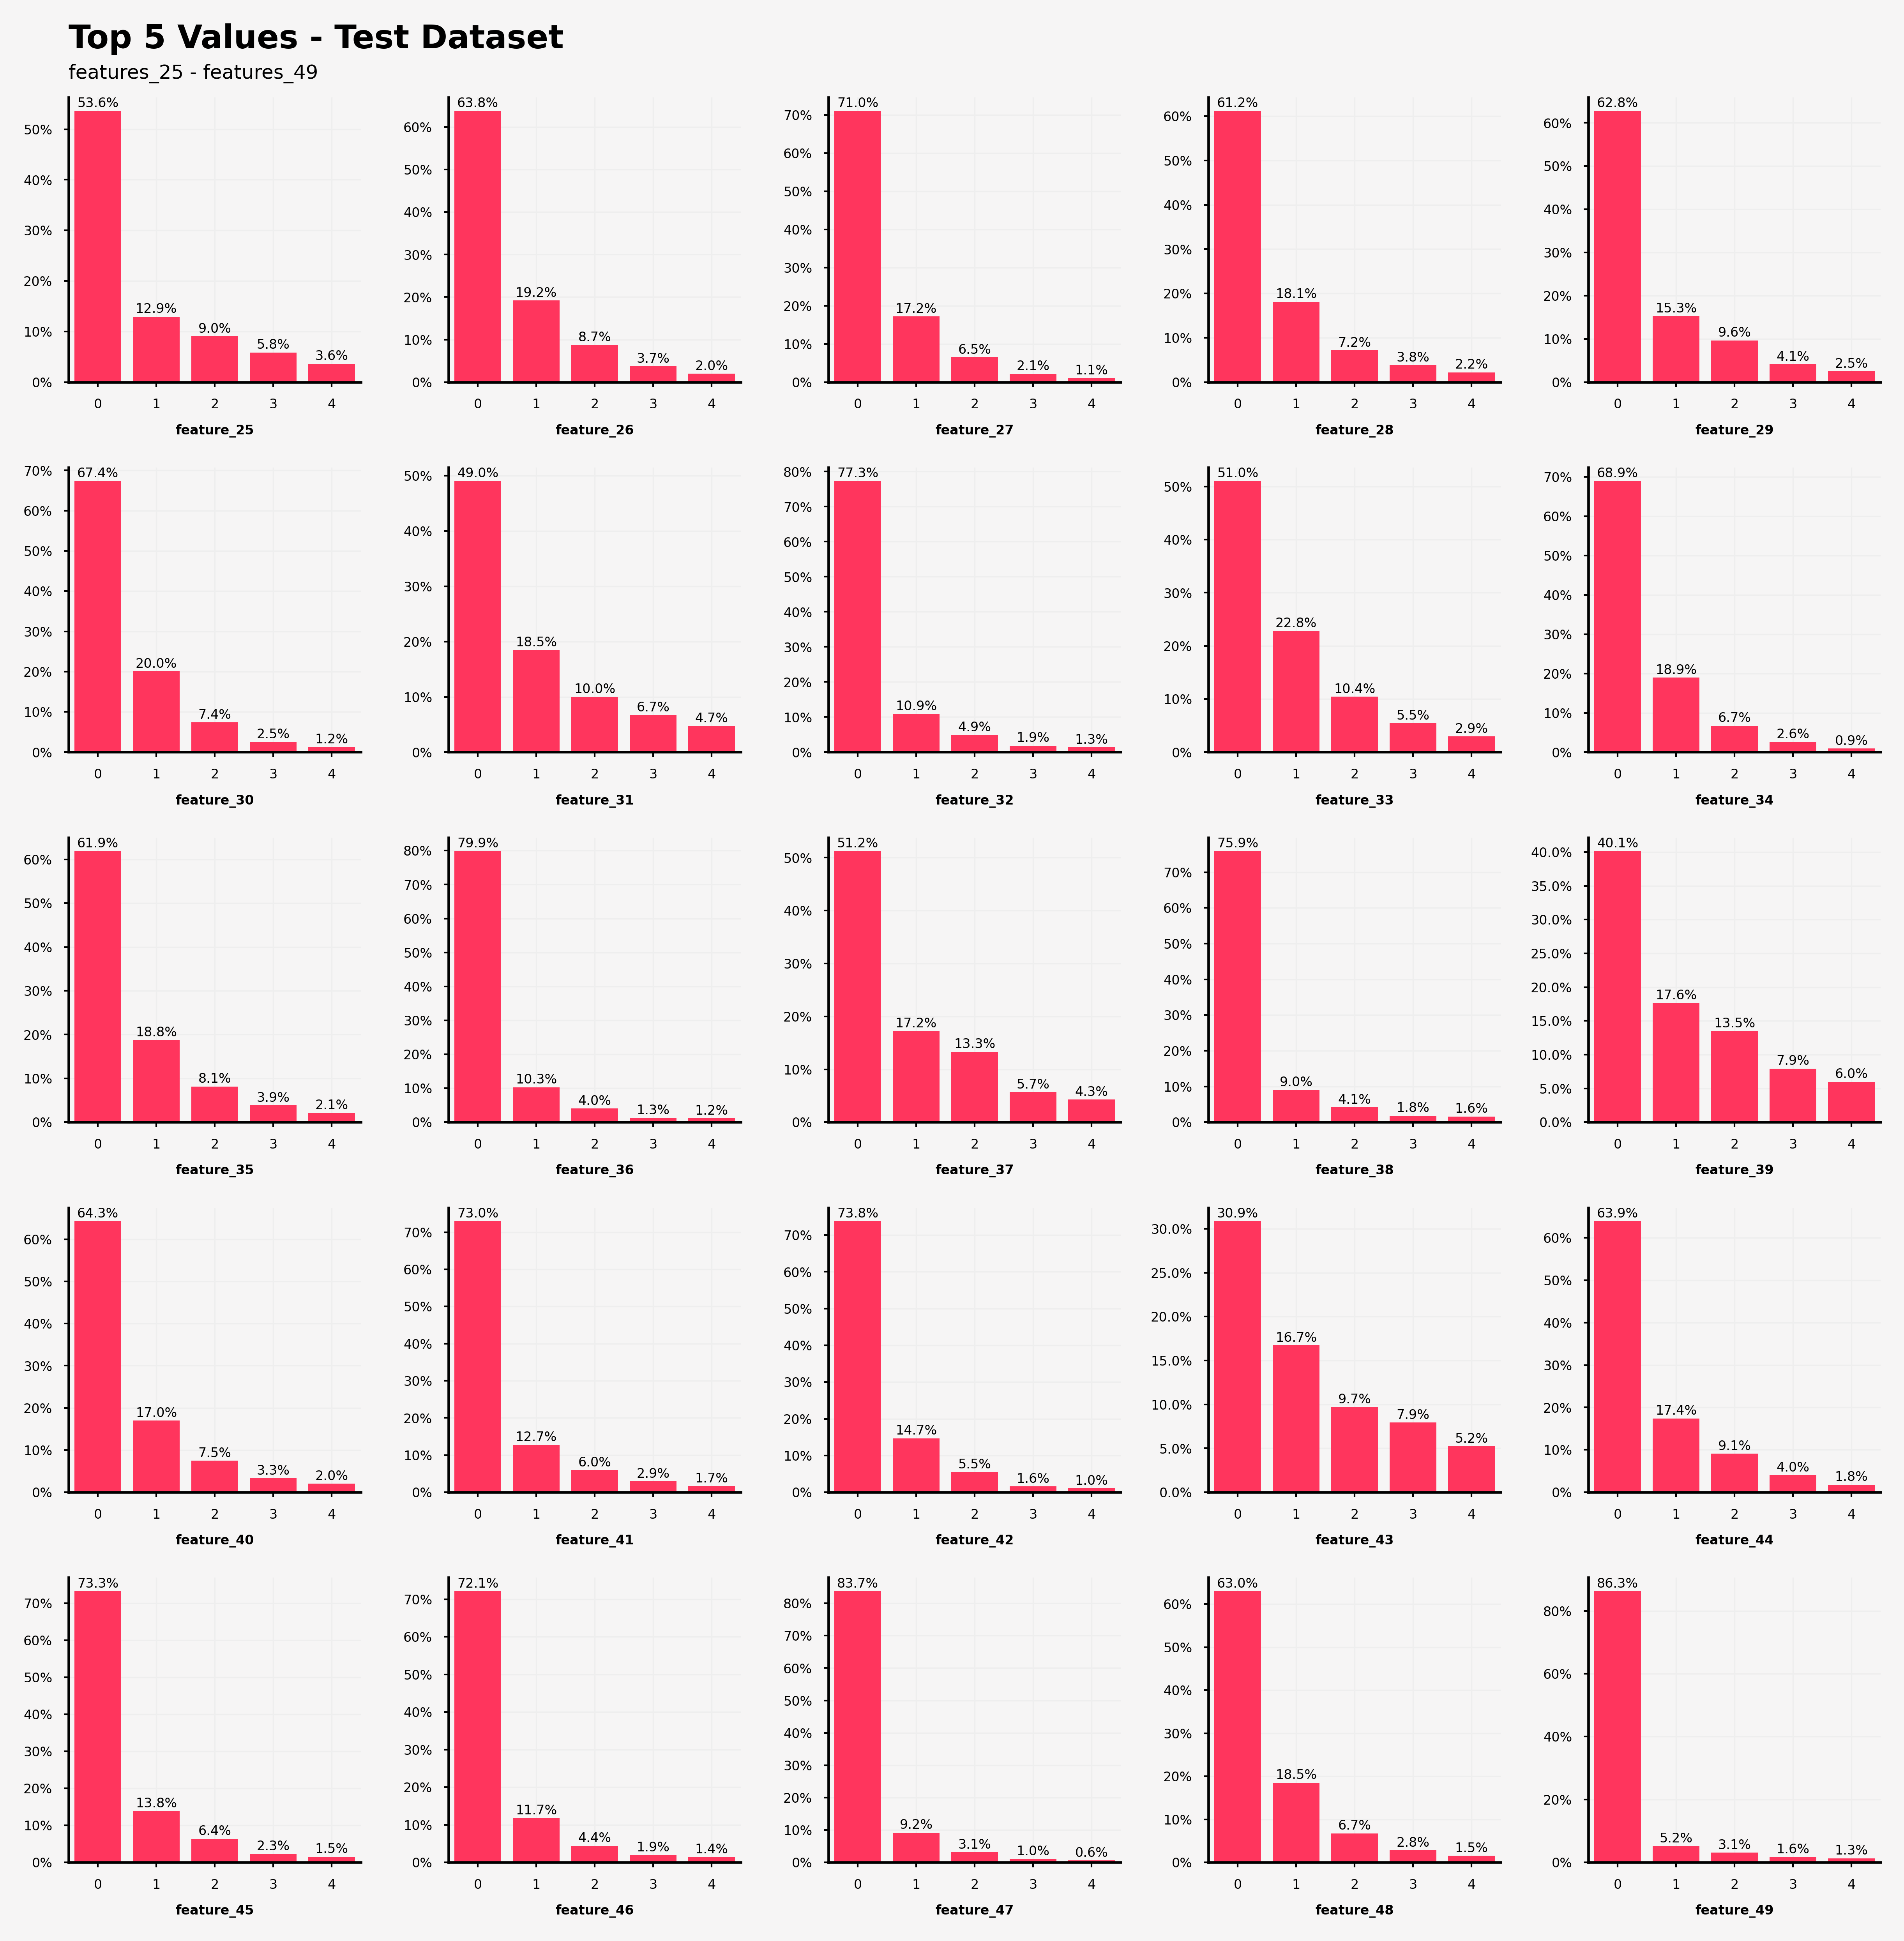

In [24]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*25)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-0.5, 66, 'Top 5 Values - Test Dataset', fontsize=10, fontweight='bold')
ax0.text(-0.5, 60, 'features_25 - features_49', fontsize=6, fontweight='light')        

features = list(test_df.columns[26:51])

run_no = 0
for col in features:
    temp_df = pd.DataFrame(test_df[col].value_counts())[:5]
    temp_df = temp_df.reset_index(drop=False)
    temp_df.columns = ['Number', 'Count']
    sns.barplot(ax=locals()["ax"+str(run_no)],x=temp_df['Number'], y=temp_df['Count']/len(test_df)*100, zorder=2, linewidth=0, alpha=1, saturation=1)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5, length=1.5)
    locals()["ax"+str(run_no)].yaxis.set_major_formatter(ticker.PercentFormatter())
    # data label
    for p in locals()["ax"+str(run_no)].patches:
        percentage = f'{p.get_height():.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        locals()["ax"+str(run_no)].text(x, y, percentage, ha='center', va='center', fontsize=4)

    run_no += 1

plt.show()

#### 4.2.2.3 features_50 - features_74
`features_50` - `features_74` have a same observations as train dataset, below are the repeating observations.

**Observations:**
- Zero is dominating the occurance with more than 50% of each feature, except for `feature_50`, `feature_54` and `feature_56`.
- Top 5 values in each feature has contributed more than 80% of each feature, except for `feature_54`.




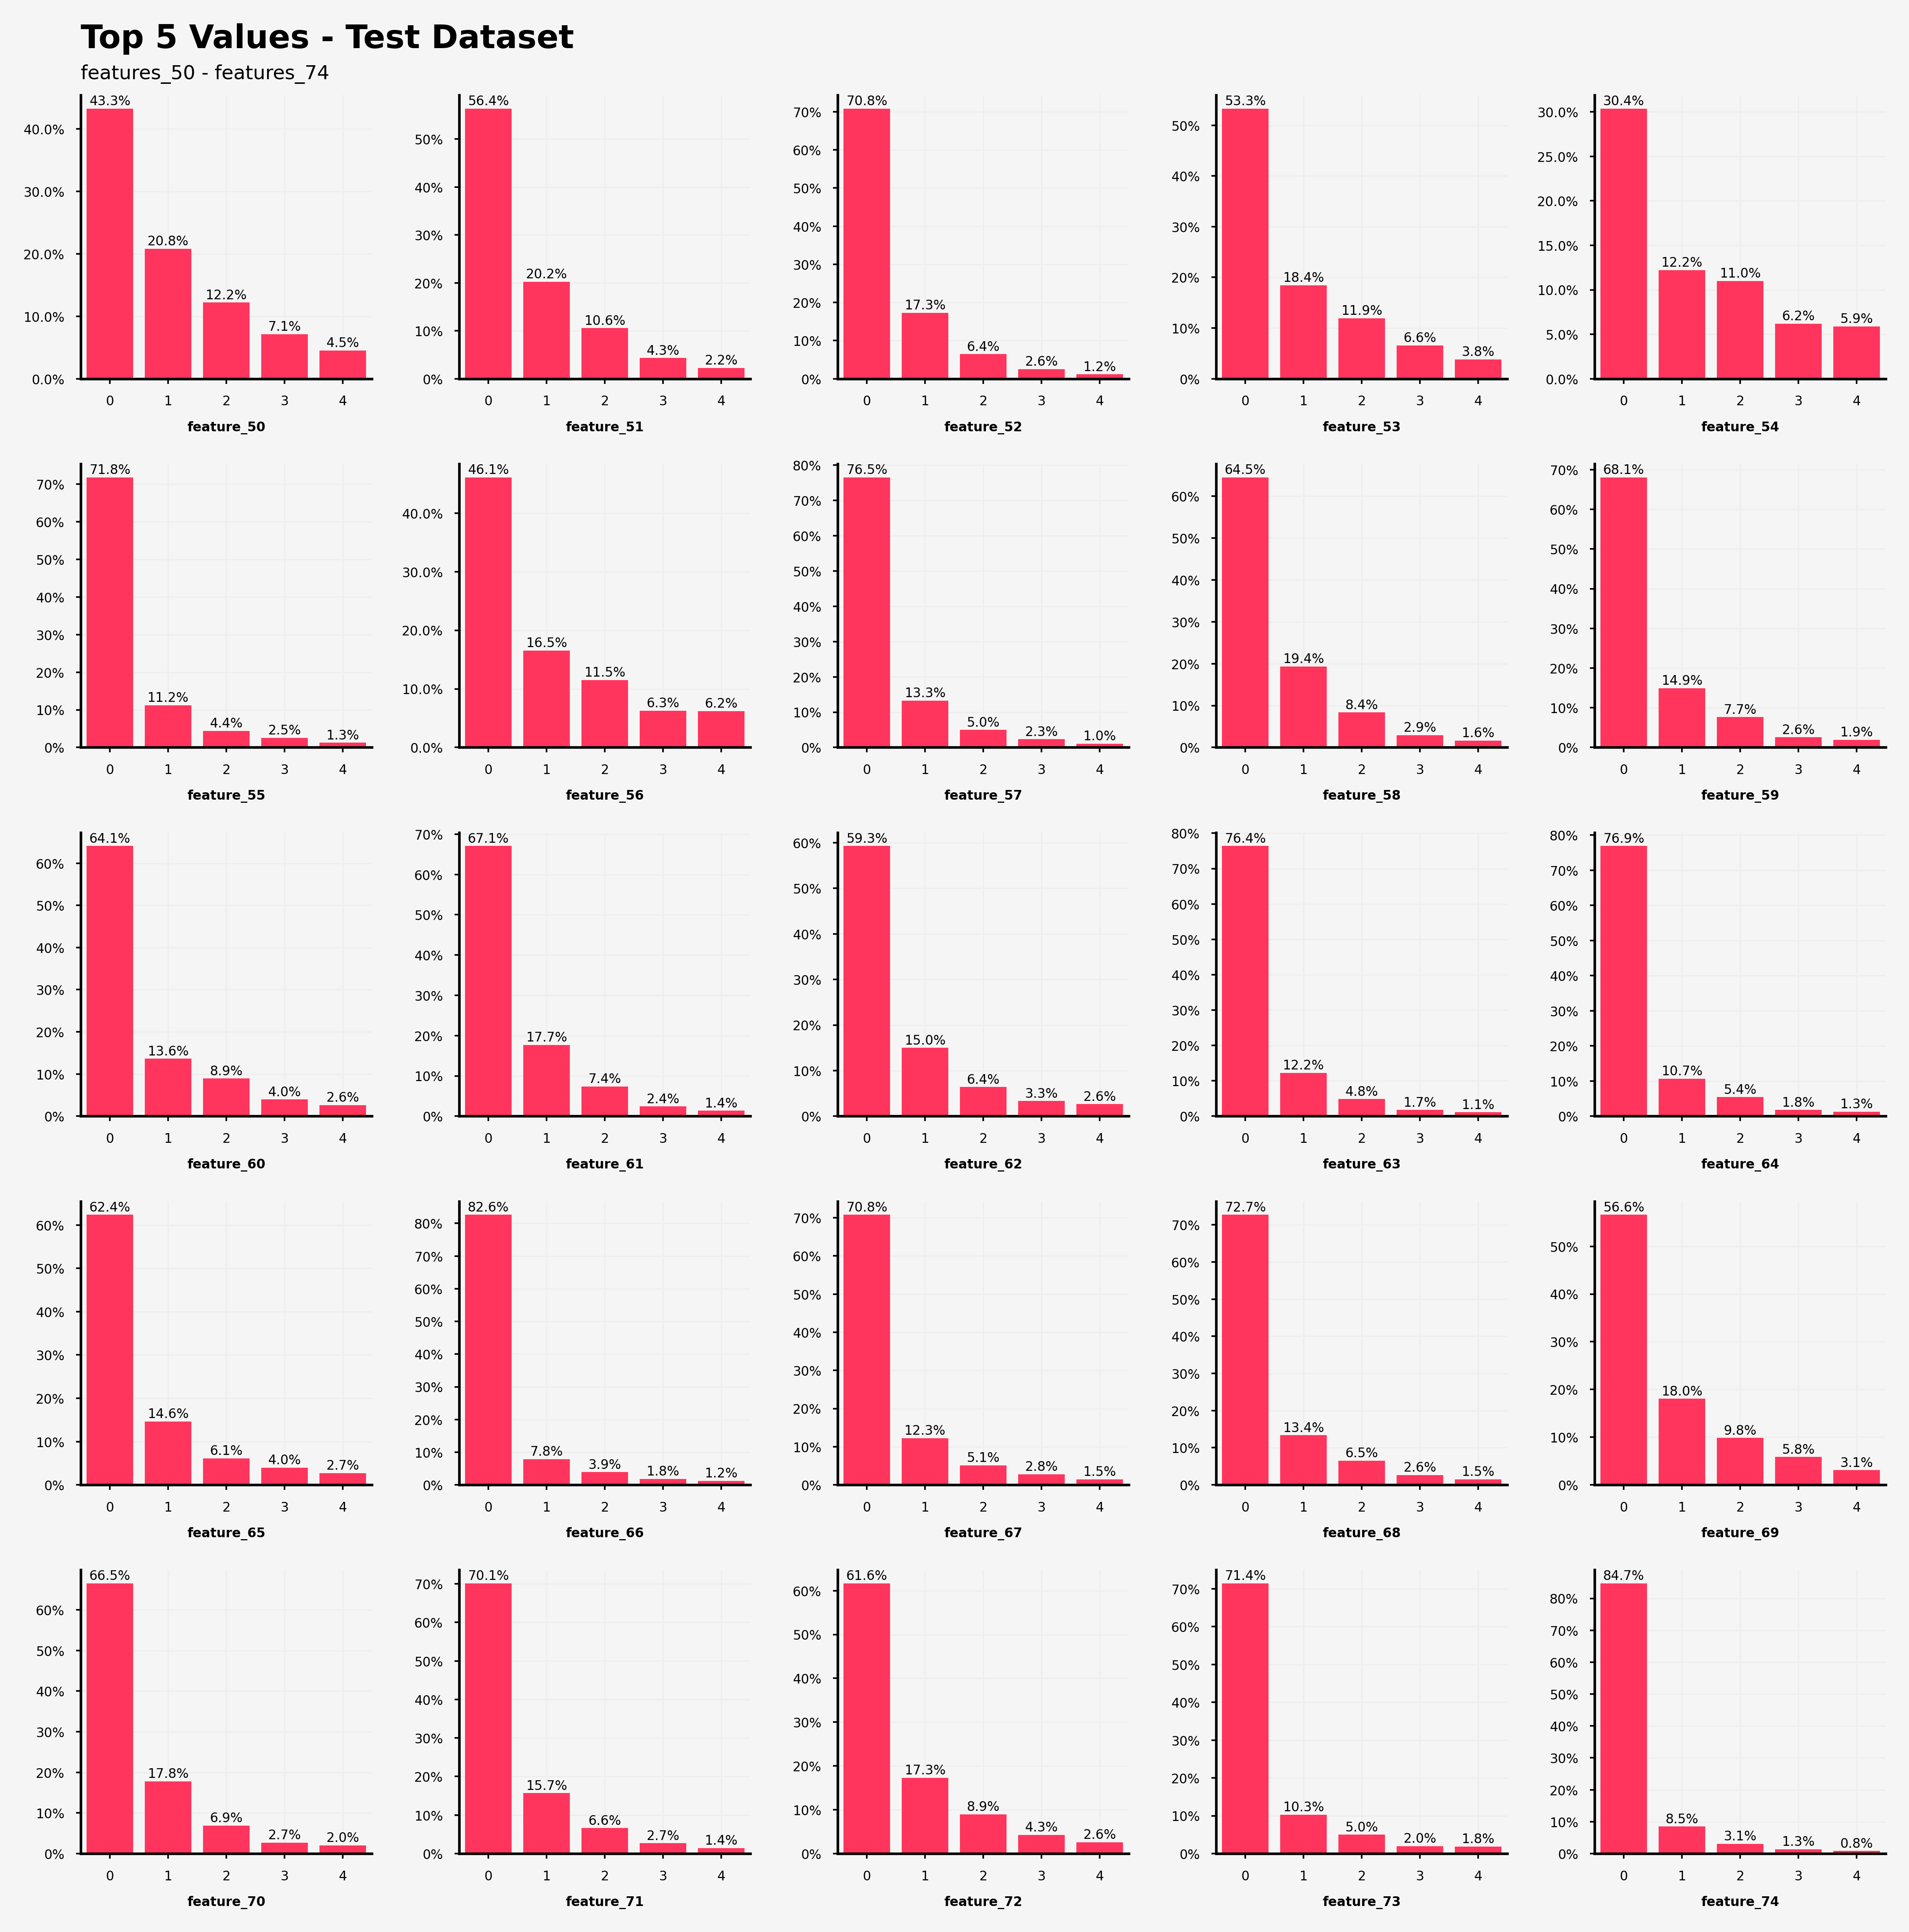

In [25]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*25)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-0.5, 53, 'Top 5 Values - Test Dataset', fontsize=10, fontweight='bold')
ax0.text(-0.5, 48, 'features_50 - features_74', fontsize=6, fontweight='light')        

features = list(test_df.columns[51:76])

run_no = 0
for col in features:
    temp_df = pd.DataFrame(test_df[col].value_counts())[:5]
    temp_df = temp_df.reset_index(drop=False)
    temp_df.columns = ['Number', 'Count']
    sns.barplot(ax=locals()["ax"+str(run_no)],x=temp_df['Number'], y=temp_df['Count']/len(test_df)*100, zorder=2, linewidth=0, alpha=1, saturation=1)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5, length=1.5)
    locals()["ax"+str(run_no)].yaxis.set_major_formatter(ticker.PercentFormatter())
    # data label
    for p in locals()["ax"+str(run_no)].patches:
        percentage = f'{p.get_height():.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        locals()["ax"+str(run_no)].text(x, y, percentage, ha='center', va='center', fontsize=4)

    run_no += 1

plt.show()

Thank you for reading this, I will try to update as much as I can. If you find anything wrong, please let me know. Critics are very welcomed. This EDA will be quite the same with previous [TPS May 2021 EDA & Model](https://www.kaggle.com/dwin183287/tps-may-2021-eda-model).